# JUN 작업 파일

## 파일 로드 및 확인

In [63]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import math
from keras.utils.np_utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping, Callback
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.compose import make_column_transformer
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV

import warnings

pd.set_option('display.max_columns', None)
# 데이터 불러오기
df = pd.read_csv('C:/Users/galaxy/Desktop/2023/JB_Data/loan_customer.csv')
# 데이터 기본 정보 확인
df.info()    # 데이터 정보 출력 (데이터 타입, 누락값 확인)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SK_ID_CURR                  24000 non-null  int64  
 1   NAME_CONTRACT_TYPE          24000 non-null  object 
 2   CODE_GENDER                 16906 non-null  object 
 3   FLAG_OWN_REALTY             14429 non-null  object 
 4   CNT_CHILDREN                24000 non-null  int64  
 5   AMT_INCOME_TOTAL            24000 non-null  float64
 6   AMT_CREDIT                  16700 non-null  float64
 7   NAME_INCOME_TYPE            24000 non-null  object 
 8   NAME_EDUCATION_TYPE         24000 non-null  object 
 9   NAME_FAMILY_STATUS          24000 non-null  object 
 10  NAME_HOUSING_TYPE           24000 non-null  object 
 11  REGION_POPULATION_RELATIVE  16851 non-null  float64
 12  DAYS_BIRTH                  19251 non-null  float64
 13  DAYS_EMPLOYED               168

In [2]:
column_info = {'SK_ID_CURR':'대출식별번호',
'NAME_CONTRACT_TYPE':'계약유형',
'CODE_GENDER':'성별',
'FLAG_OWN_REALTY':'자가부동산보유여부',
'CNT_CHILDREN':'자녀수',
'AMT_INCOME_TOTAL':'소득금액(USD)',
'AMT_CREDIT':'신용대출금액(USD)',
'NAME_INCOME_TYPE':'소득유형',
'NAME_EDUCATION_TYPE':'학력',
'NAME_FAMILY_STATUS':'결혼상태',
'NAME_HOUSING_TYPE':'주거형태',
'REGION_POPULATION_RELATIVE':'거주지역의표준화된인구',
'DAYS_BIRTH':'대출신청시점에서의일단위나이(기준시점대비상대적인시간)',
'DAYS_EMPLOYED':'대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)',
'DAYS_REGISTRATION':'대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)',
'DAYS_ID_PUBLISH':'대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)',
'FLAG_MOBIL':'휴대폰번호등록여부',
'FLAG_EMP_PHONE':'고용주연락처등록여부',
'FLAG_WORK_PHONE':'직장전화번호등록여부',
'FLAG_PHONE':'집전화번호등록여부',
'FLAG_EMAIL':'이메일주소등록여부',
'REGION_RATING_CLIENT':'거주지등급',
'WEEKDAY_APPR_PROCESS_START':'대출신청요일',
'HOUR_APPR_PROCESS_START':'대출신청시간대',
'REG_CITY_NOT_LIVE_CITY':'고객의등록지주소와실거주지일치여부',
'REG_CITY_NOT_WORK_CITY':'고객의등록지주소와직장주소일치여부',
'LIVE_CITY_NOT_WORK_CITY':'고객의실거주지와직장주소일치여부',
'ORGANIZATION_TYPE':'근무회사유형',
'FLAG_DOCUMENT_2':'문서2제공여부',
'FLAG_DOCUMENT_3':'문서3제공여부',
'FLAG_DOCUMENT_4':'문서4제공여부',
'CB_SCORE_1':'신용점수1',
'CB_SCORE_2':'신용점수2',
'CB_SCORE_3':'신용점수3',
'TARGET':'연체여부'}

In [3]:

df_colinfo = df.copy() 

for col in df_colinfo.columns : 
    df_colinfo.rename(columns = {col:column_info[col]}, inplace = True)
    print(col+'컬럼의 이름을 '+column_info[col]+'로 수정했습니다 ')

SK_ID_CURR컬럼의 이름을 대출식별번호로 수정했습니다 
NAME_CONTRACT_TYPE컬럼의 이름을 계약유형로 수정했습니다 
CODE_GENDER컬럼의 이름을 성별로 수정했습니다 
FLAG_OWN_REALTY컬럼의 이름을 자가부동산보유여부로 수정했습니다 
CNT_CHILDREN컬럼의 이름을 자녀수로 수정했습니다 
AMT_INCOME_TOTAL컬럼의 이름을 소득금액(USD)로 수정했습니다 
AMT_CREDIT컬럼의 이름을 신용대출금액(USD)로 수정했습니다 
NAME_INCOME_TYPE컬럼의 이름을 소득유형로 수정했습니다 
NAME_EDUCATION_TYPE컬럼의 이름을 학력로 수정했습니다 
NAME_FAMILY_STATUS컬럼의 이름을 결혼상태로 수정했습니다 
NAME_HOUSING_TYPE컬럼의 이름을 주거형태로 수정했습니다 
REGION_POPULATION_RELATIVE컬럼의 이름을 거주지역의표준화된인구로 수정했습니다 
DAYS_BIRTH컬럼의 이름을 대출신청시점에서의일단위나이(기준시점대비상대적인시간)로 수정했습니다 
DAYS_EMPLOYED컬럼의 이름을 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_REGISTRATION컬럼의 이름을 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
DAYS_ID_PUBLISH컬럼의 이름을 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)로 수정했습니다 
FLAG_MOBIL컬럼의 이름을 휴대폰번호등록여부로 수정했습니다 
FLAG_EMP_PHONE컬럼의 이름을 고용주연락처등록여부로 수정했습니다 
FLAG_WORK_PHONE컬럼의 이름을 직장전화번호등록여부로 수정했습니다 
FLAG_PHONE컬럼의 이름을 집전화번호등록여부로 수정했습니다 
FLAG_EMAIL컬럼의 이름을 이메일주소등록여부로 수정했습니다 
REGION_RATING_CLIENT컬럼의 이름을 거주지등급로 수정했습니다 
WEEKDAY_APPR_PROCESS_START

In [4]:
df_colinfo.describe()
df_colinfo.head()       # 데이터 상위 몇 개 행 출력
# 결측치 확인
print("결측치가 있는 행의 수는",len(df_colinfo),"중",len(df_colinfo[df_colinfo.isnull().any(axis=1)]))
# 대부분의 행이 결측치가 있음
missing_values = df_colinfo.isnull().sum()
missing_values[missing_values > 0 ]

결측치가 있는 행의 수는 24000 중 23562


성별                                         7094
자가부동산보유여부                                  9571
신용대출금액(USD)                                7300
거주지역의표준화된인구                                7149
대출신청시점에서의일단위나이(기준시점대비상대적인시간)               4749
대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)             7149
대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)    9733
대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)     4741
신용점수1                                      6146
신용점수2                                      8274
신용점수3                                      7108
dtype: int64

## 변수 편집

In [5]:
data = df.copy()

### 1. 변수 범주화

In [6]:
data['DAYS_BIRTH'] = data['DAYS_BIRTH']/360
data['DAYS_BIRTH'] = data['DAYS_BIRTH']*-1

data['DAYS_BIRTH'] = data['DAYS_BIRTH'].apply(lambda x: math.ceil(x) if not np.isnan(x) else np.nan)
data['DAYS_BIRTH']

0        27.0
1        53.0
2        36.0
3        32.0
4         NaN
         ... 
23995    54.0
23996    34.0
23997     NaN
23998    39.0
23999    36.0
Name: DAYS_BIRTH, Length: 24000, dtype: float64

### 2. 변수 결측치 채우기

#### 1. 이상치 처리
- #### 이상값 모두 결측치로 통일하여 처리

In [7]:
#data = data.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)
data = df.copy()
# data = data.replace(['XNA'], np.nan)

- 최종 결측치 컬럼 확인

In [8]:
# 결측값이 있는 행 선택하기
col_mv_list = data.columns[data.isnull().any()]

for column in col_mv_list:
    print(f"- {column} {column_info[column]}")

- CODE_GENDER 성별
- FLAG_OWN_REALTY 자가부동산보유여부
- AMT_CREDIT 신용대출금액(USD)
- REGION_POPULATION_RELATIVE 거주지역의표준화된인구
- DAYS_BIRTH 대출신청시점에서의일단위나이(기준시점대비상대적인시간)
- DAYS_EMPLOYED 대출신청시점에서의고객의근무일수(기준시점대비상대적인시간)
- DAYS_REGISTRATION 대출신청이전에고객이등록정보를변경한시점사이의일수(기준시점대비상대적인시간)
- DAYS_ID_PUBLISH 대출신청이전에고객이신분증을변경한시점사이의일수(기준시점대비상대적인시간)
- CB_SCORE_1 신용점수1
- CB_SCORE_2 신용점수2
- CB_SCORE_3 신용점수3


#### 2. 패턴을 찾아 채우기

In [9]:
from scipy import stats
def replace_missing_values(df, col_fill_values):
    for col, fill_method in col_fill_values.items():
        if fill_method == 'mode':
            mode_result = stats.mode(df[col])
            fill_value = mode_result.mode[0]
           
        elif fill_method == 'median':
            fill_value = df[col].median()
       
        else:
            raise ValueError(f"Invalid method for column '{column}'.Choose either 'mode' or 'median'.")
           
        df[col] = df[col].fillna(fill_value)
    return df

In [10]:
# 결측치가 한개인 컬럼은 최빈값으로 대체

data = data.replace(['Unknown'], np.nan)

fill_methods = {

    'NAME_FAMILY_STATUS': 'mode',

}

data = replace_missing_values(data,fill_methods)
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0].index.to_list()
missing_values

C:\Users\galaxy\AppData\Local\Temp\ipykernel_8808\1735547379.py:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode_result = stats.mode(df[col])
C:\Users\galaxy\AppData\Local\Temp\ipykernel_8808\1735547379.py:5: DeprecationWarning: Support for non-numeric arrays has been deprecated as of SciPy 1.9.0 and will be removed in 1.11.0. `pandas.DataFrame.mode` can be used instead, see https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mode.html.
  mode_result = stats.mode(df[col])


['CODE_GENDER',
 'FLAG_OWN_REALTY',
 'AMT_CREDIT',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CB_SCORE_1',
 'CB_SCORE_2',
 'CB_SCORE_3']

In [11]:
# data.loc[data['FLAG_EMP_PHONE'] == 0, [ 'DAYS_EMPLOYED']] = 365243.0

# data.loc[data['DAYS_EMPLOYED'] == 365243.0, [ 'DAYS_EMPLOYED']]  = 0


### 변수 타입 변경

In [12]:
data = data.astype({'FLAG_MOBIL': object, 'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object })

#### 3. 딥러닝 방식

#### 딥러닝 Input 데이터 분류

In [6]:
def columns_classification(data):
    # 주어진 데이터를 수치형, 범주형, 결측치가 있는 컬럼으로 분류하여 뱉어냄.
    
    numeric_columns = data.select_dtypes(include=['int', 'float']).columns
    categorical_columns = data.select_dtypes(include=['object']).columns
    missing_values = data.isnull().sum()
    missing_values = missing_values[missing_values > 0].index.to_list()

    numeric_columns = numeric_columns.to_list()
    numeric_columns = [x for x in numeric_columns if x not in missing_values]
    numeric_columns

    categorical_columns = categorical_columns.to_list()
    categorical_columns = [x for x in categorical_columns if x not in missing_values]
    categorical_columns    
    print('total_columns : ' + str(len(data.columns)))
    
    print('numeric_columns : ' + str(len(numeric_columns)))
    print(numeric_columns)
    print('categorical_columns : '+ str(len(categorical_columns)))
    print(categorical_columns)
    print('missing_values : '+ str(len(missing_values)))
    print(missing_values)
    return numeric_columns,categorical_columns,missing_values
    
    

In [7]:
numeric_columns,categorical_columns,missing_values = columns_classification(data)

total_columns : 35
numeric_columns : 17
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'TARGET']
categorical_columns : 7
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']


## 딥러닝 예측함수 정의

### 범주형 맞출때

In [8]:
def fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 ):
    
    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 성별 전용
    if target_col_val == 'CODE_GENDER':
        data_with_missing.loc[data_with_missing['CODE_GENDER'] == 'XNA', 'CODE_GENDER'] = np.nan
    if target_col_val == 'ORGANIZATION_TYPE':
        data_with_missing.loc[data_with_missing['ORGANIZATION_TYPE'] == 'XNA', 'ORGANIZATION_TYPE'] = np.nan
        
    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()



    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)

    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]
    
    output_dim = data_with_missing[target_col_val].nunique()
    print(output_dim)

    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(65, activation='relu'),
        tf.keras.layers.Dropout(0.5),  # Dropout 추가
        tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
        tf.keras.layers.Dropout(0.5),  # Dropout 추가
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(output_dim, activation='softmax')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


    # 타겟 컬럼 추후 원래 레이블으로 표기하기 위함

    # LabelEncoder 객체 생성 및 학습
    encoder_target = LabelEncoder()
    encoder_target.fit(no_missing_data[target_column])
    integer_encoded_labels = encoder_target.transform(no_missing_data[target_column])
    integer_encoded_labels



    one_hot_train_labels = to_categorical(integer_encoded_labels)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, one_hot_train_labels, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val, verbose=2, callbacks=[early_stopping_cb])
    

    
    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    filled_values = predicted_values.squeeze()


    original_label=np.argmax(filled_values, axis=1)
    predicted_labels_string = encoder_target.inverse_transform(original_label)

    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = predicted_labels_string


    print(data_with_fill.loc[missing_data_index, target_column].head())
    return data_with_fill
    

### 수치형 맞출떄

In [9]:
def fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_2' ,epochs_val=30, batch_size_val=32 ):

    # 결측치 있는 데이터 준비
    data_with_missing = data.copy()

    # 결측치 채우기를 위한 데이터 준비
    target_column = target_col_val  # 채울 결측치가 있는 컬럼명
    input_numeric_columns = numeric_columns[1:]

    # 결측치가 없는 데이터 추출 추후 행 인덱스
    no_missing_data = data_with_missing[data_with_missing[target_column].notnull()]
    # 결측치 추후에 어떻게 채워지는 지 확인하기 위한 인덱스
    missing_data_index = data_with_missing[target_column].isnull()


    # 범주형 변수 인코딩
    encoder = OneHotEncoder(drop='first')
    categorical_data_encoded = encoder.fit_transform(data_with_missing[categorical_columns]).toarray()
    
    # 데이터 스케일링
    scaler = StandardScaler()
    scaled_numeric_data = scaler.fit_transform(data_with_missing[input_numeric_columns])

    # 모든 입력 데이터 결합
    input_data_encoded = np.hstack((scaled_numeric_data, categorical_data_encoded))
    len(input_data_encoded)


    print(len(input_data_encoded))

    train_data_scaled = input_data_encoded[data_with_missing[target_column].notnull()]


    print(len(train_data_scaled))

    # 결측치를 채울 Autoencoder 모델 구성
    input_dim = input_data_encoded.shape[1]




    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(input_dim,)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(65, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='linear')  # 선형 활성화 함수 사용
    ])

    model.compile(optimizer='adam',
          loss='mean_squared_error',
          metrics=['mean_squared_error'])


    # Prepare target data
    target_data = no_missing_data[target_column].values.reshape(-1, 1)
    # Scale target data using a new scaler
    target_scaler = StandardScaler()
    target_data_scaled = target_scaler.fit_transform(target_data)

    # 모델 훈련전에 검증 데이터 셋으로 분류해 모델 학습이 제대로 되는지 평가

    X_train, X_val, y_train, y_val = train_test_split(train_data_scaled, target_data_scaled, test_size=0.2, random_state=42)

    # 과적합 방지 목적으로, 더이상 검증 데이터의 정확성 안올라가면 학습 중지
    early_stopping_cb = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    # 모델 훈련
    model.fit(X_train, y_train, validation_data=(X_val,y_val), epochs=epochs_val, batch_size=batch_size_val,  verbose=2,callbacks=[early_stopping_cb])


    missing_data = input_data_encoded[data_with_missing[target_column].isnull()]
    
    print(len(missing_data))
    print(len(missing_data[0]))

    # 훈련된 모델로 결측치 예측 및 채우기
    predicted_values = model.predict(missing_data)
    predicted_values_orgin = target_scaler.inverse_transform(predicted_values)
    filled_values = predicted_values_orgin.squeeze()


    # 결측치를 채워 넣음
    data_with_fill = data_with_missing.copy()
    
    data_with_fill[target_column+"_predicted_flag"] = "N"
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column+"_predicted_flag"] = "Y"
    
    data_with_fill.loc[data_with_missing[target_column].isnull(), target_column] = filled_values
    data_with_fill.loc[missing_data_index, target_column]


    # 그래프로 분포가 어떻게 그려지는지 한번 확인함.

    result = data_with_fill.loc[missing_data_index, target_column]
    OG_result = data_with_fill.loc[:, target_column]

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))  # 1 row, 2 columns

    result.hist(bins=30, ax=axs[0])  
    axs[0].set_title("Predict "+result.name)
    axs[0].set_xlabel('Value')
    axs[0].set_ylabel('Frequency')

    OG_result.hist(bins=30, ax=axs[1])  
    axs[1].set_title("Origin "+OG_result.name)
    axs[1].set_xlabel('Value')
    axs[1].set_ylabel('Frequency')

    plt.tight_layout()  # Adjust the padding between and around the subplots.
    plt.show()

    return data_with_fill
    

#### 결측치 채우기

- 데이터를 채우면서, 예측값 여부 컬럼을 추가적으로 생성함
- 예측한 컬럼을 다음예측에 사용했을 경우, 큰 차이는 없음

total_columns : 35
numeric_columns : 6
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 18
['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4']
missing_values : 11
['CODE_GENDER', 'FLAG_OWN_REALTY', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
2
Epoch 1/30
423/423 - 3s - loss: 0.6492 - accuracy: 0.6667 - val_loss: 0.5916 - val_accuracy: 0.6992 - 3s/epoch - 8ms/step
Epoch 2/30
423/423 - 2s - loss: 0.5885 - accuracy: 0.7105 - val_loss: 0.5687 - val_accuracy: 0.7172 - 2s/ep

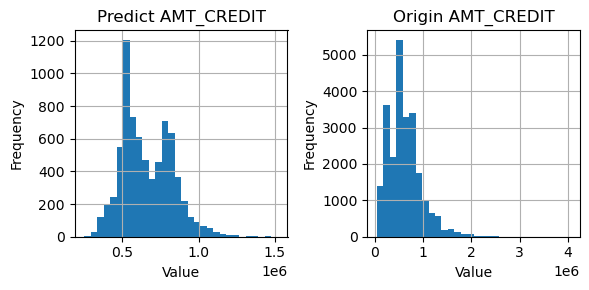

total_columns : 38
numeric_columns : 7
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 23
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag']
missing_values : 8
['REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
16851
Epoch 1/32
422/422 - 4s - loss: 0.8483 - mean_squared_error: 0.7947 - val_loss: 0.6101 - val_mean_squared_error: 0.5644 - 4s/epoch - 

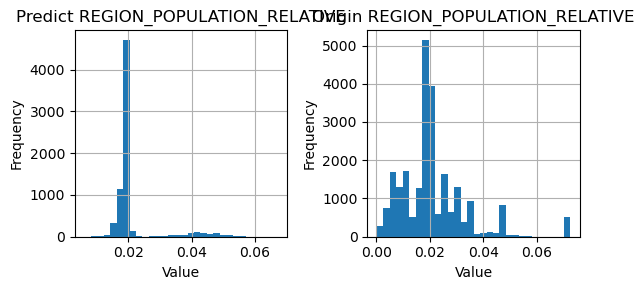

total_columns : 39
numeric_columns : 8
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 24
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag']
missing_values : 7
['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
19251
Epoch 1/32
482/482 - 4s - loss: 0.6705 - mean_squared_error: 0.6183 - val_loss: 0.5333 -

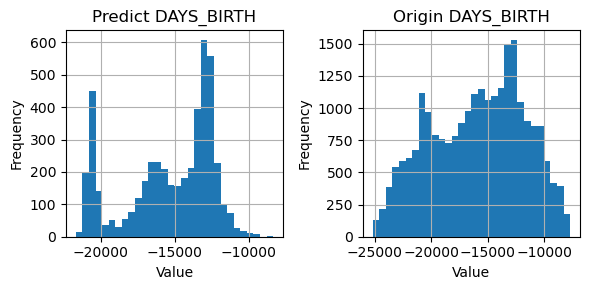

total_columns : 40
numeric_columns : 9
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 25
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag']
missing_values : 6
['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
13852
Epoch 1/32
347/347 - 3s - loss: 1.0037 - mean_squared_error

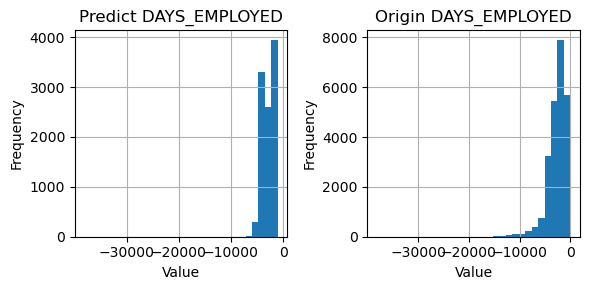

total_columns : 41
numeric_columns : 10
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 26
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag']
missing_values : 5
['DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24000
14267
Epoch 1/32
357/357 - 3s - 

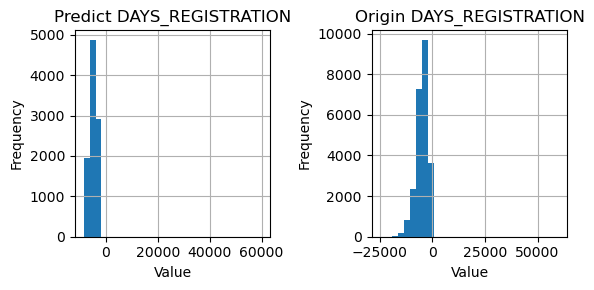

total_columns : 42
numeric_columns : 11
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 27
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag']
missing_values : 4
['DAYS_ID_PUBLISH', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']
24

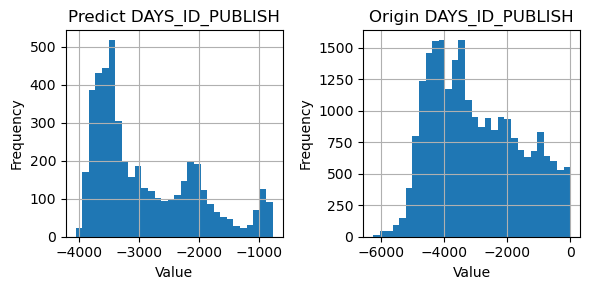

total_columns : 43
numeric_columns : 12
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'TARGET']
categorical_columns : 28
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag']
missing_values : 3
['CB_SCORE_

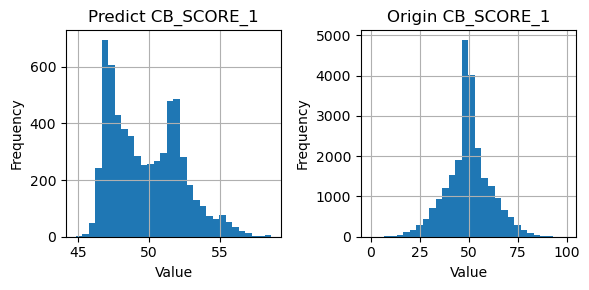

total_columns : 44
numeric_columns : 13
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'TARGET']
categorical_columns : 29
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

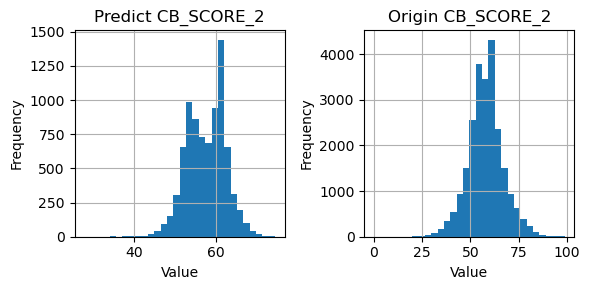

total_columns : 45
numeric_columns : 14
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'TARGET']
categorical_columns : 30
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'C

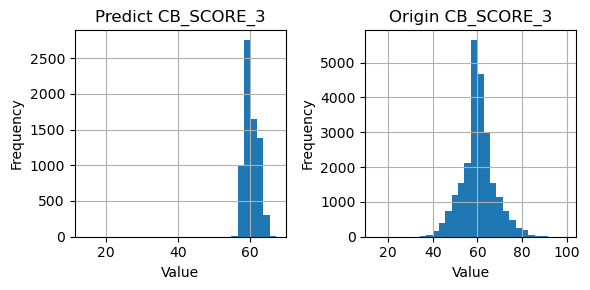

In [17]:
# 예측변수 다음예측에 사용
numeric_columns,categorical_columns,missing_values = columns_classification(data)
FILLED_DATA =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 )
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=30, batch_size_val=32 )

FILLED_DATA.loc[FILLED_DATA['DAYS_EMPLOYED'] == 365243.0, [ 'DAYS_EMPLOYED']]  = np.nan

for i in range(len(missing_values)-1):
    numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
    FILLED_DATA =fill_numeric(FILLED_DATA, numeric_columns, categorical_columns, target_col_val=missing_values[0] ,epochs_val=32, batch_size_val=32 )

 

In [18]:
# OG_TYPE 예측 
FILLED_DATA = FILLED_DATA.replace(['NaN', 'nan', 'XNA', 'Unknown'], np.nan)

FILLED_DATA = FILLED_DATA.astype({'FLAG_MOBIL': object, 'FLAG_EMP_PHONE': object , 'FLAG_WORK_PHONE': object, 'FLAG_PHONE': object, 'FLAG_EMAIL': object
                   , 'REG_CITY_NOT_LIVE_CITY': object , 'REG_CITY_NOT_WORK_CITY': object, 'LIVE_CITY_NOT_WORK_CITY': object, 'FLAG_DOCUMENT_2': object
                   , 'FLAG_DOCUMENT_3': object , 'FLAG_DOCUMENT_4': object })

numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)
FILLED_DATA =fill_categorical(FILLED_DATA, numeric_columns, categorical_columns, target_col_val='ORGANIZATION_TYPE' ,epochs_val=30, batch_size_val=32 )

total_columns : 46
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 30
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE

In [19]:
# 예측변수 미사용
# # 예측변수를 사용하는 것이 유리하다는 결론

# numeric_columns,categorical_columns,missing_values = columns_classification(data)
# FILLED_DATA2 = data.copy()
# result =fill_categorical(data, numeric_columns, categorical_columns, target_col_val='CODE_GENDER' ,epochs_val=30, batch_size_val=32 )
# FILLED_DATA2['CODE_GENDER'] = result['CODE_GENDER']
# result = fill_categorical(data, numeric_columns, categorical_columns, target_col_val='FLAG_OWN_REALTY' ,epochs_val=30, batch_size_val=32 )
# FILLED_DATA2['FLAG_OWN_REALTY'] = result['FLAG_OWN_REALTY']

# numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA2)

# for i in range(len(missing_values)):
#     result =fill_numeric(data, numeric_columns, categorical_columns, target_col_val=missing_values[i] ,epochs_val=32, batch_size_val=32 )
#     FILLED_DATA2[missing_values[i]] = result[missing_values[i]]
    
# 샘플로 확인    
# numeric_columns,categorical_columns,missing_values = columns_classification(data)
# result =fill_numeric(data, numeric_columns, categorical_columns, target_col_val='CB_SCORE_1' ,epochs_val=32, batch_size_val=32 )


### 단변량 분석 시각화

In [37]:

numeric_columns = data.select_dtypes(include=['int', 'float']).columns
categorical_columns = data.select_dtypes(include=['object']).columns

In [39]:
# 수치형 변수 시각화 (히스토그램과 상자 그림)
for column in numeric_columns[1:]:
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True)
    plt.title(f'Histogram of {column}')

    plt.tight_layout()
    plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\galaxy\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'

Error in callback <function _draw_all_if_interactive at 0x000002104566E7A0> (for post_execute):


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\galaxy\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\galaxy\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'

<Figure size 1000x400 with 1 Axes>

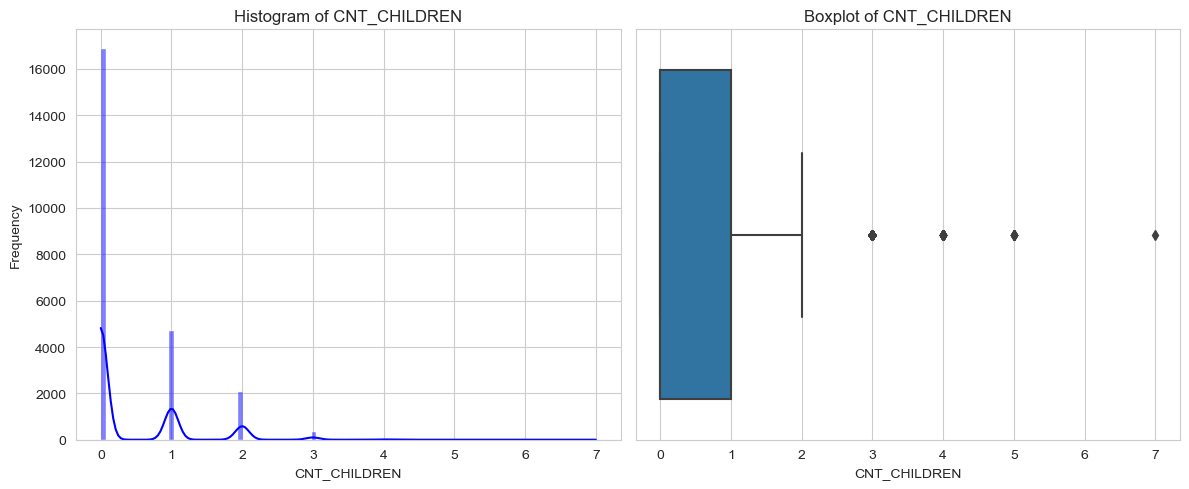

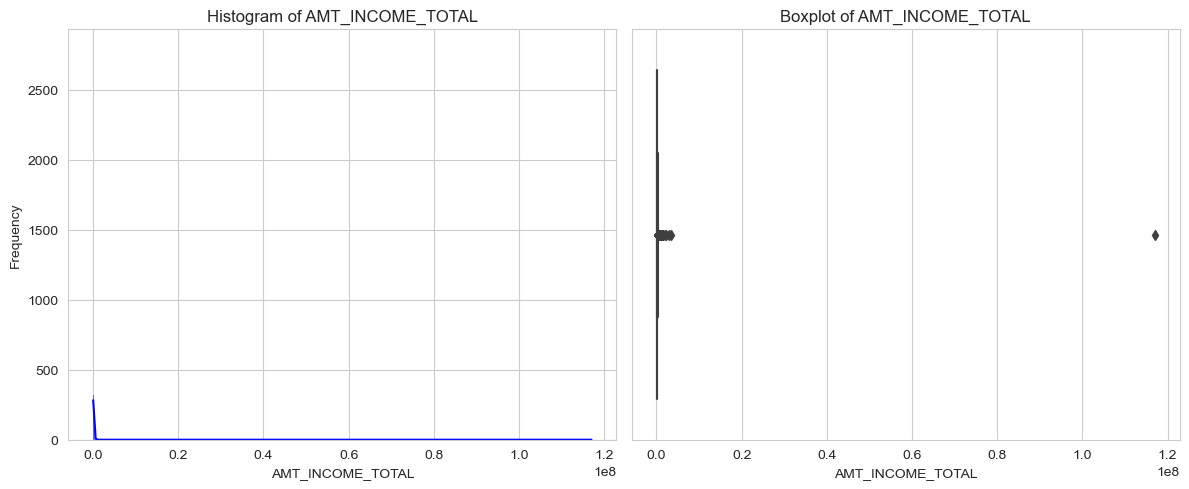

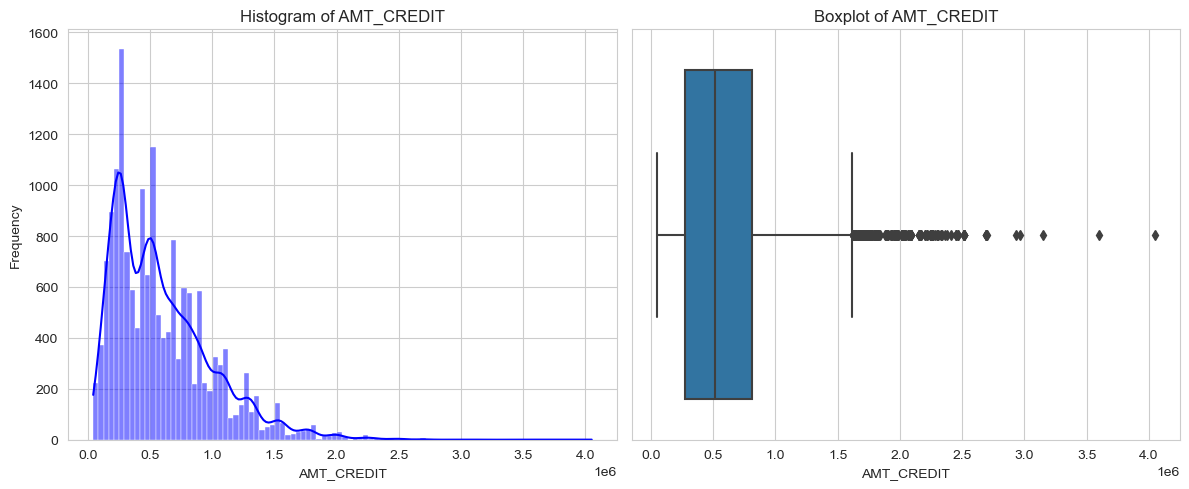

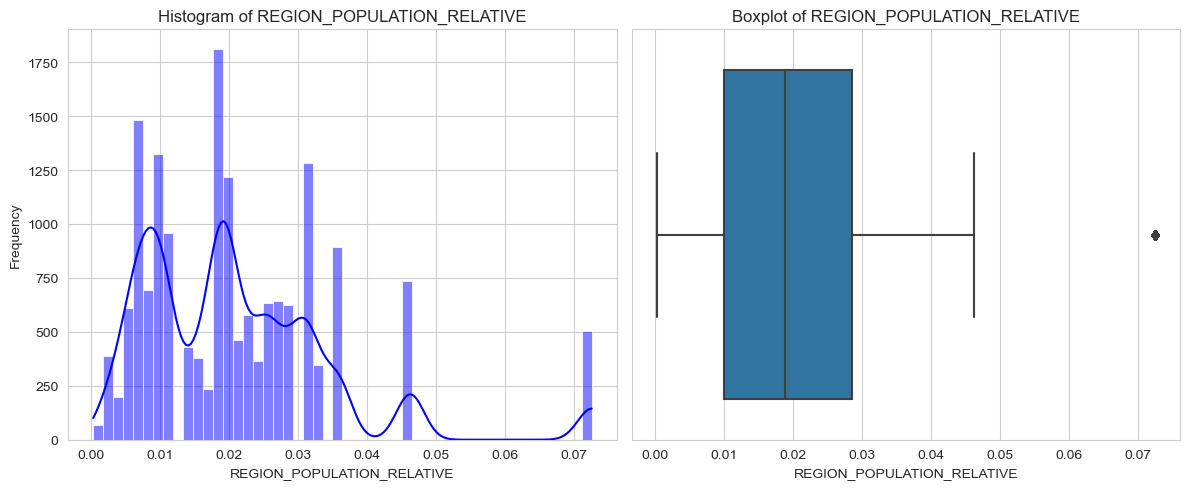

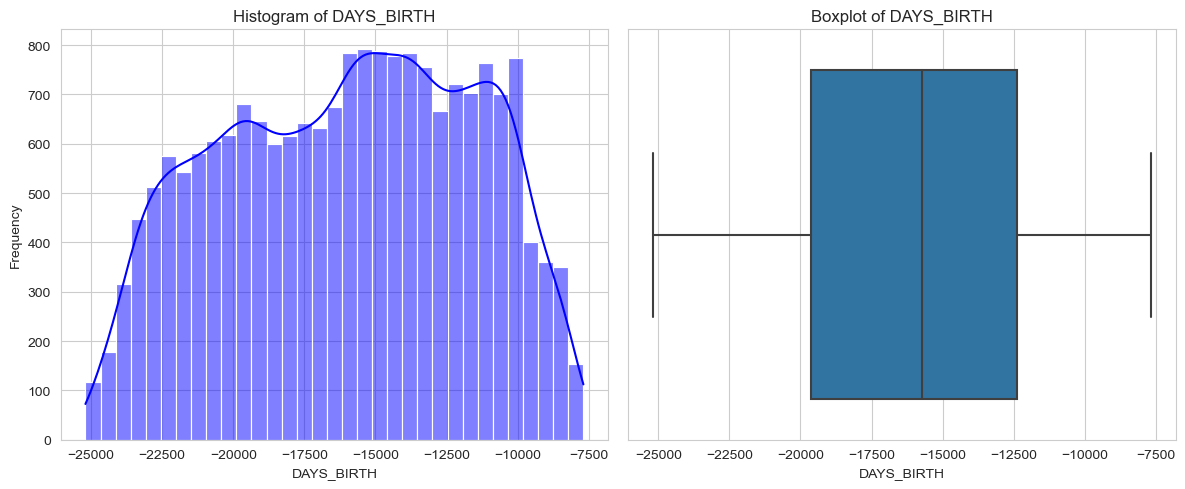

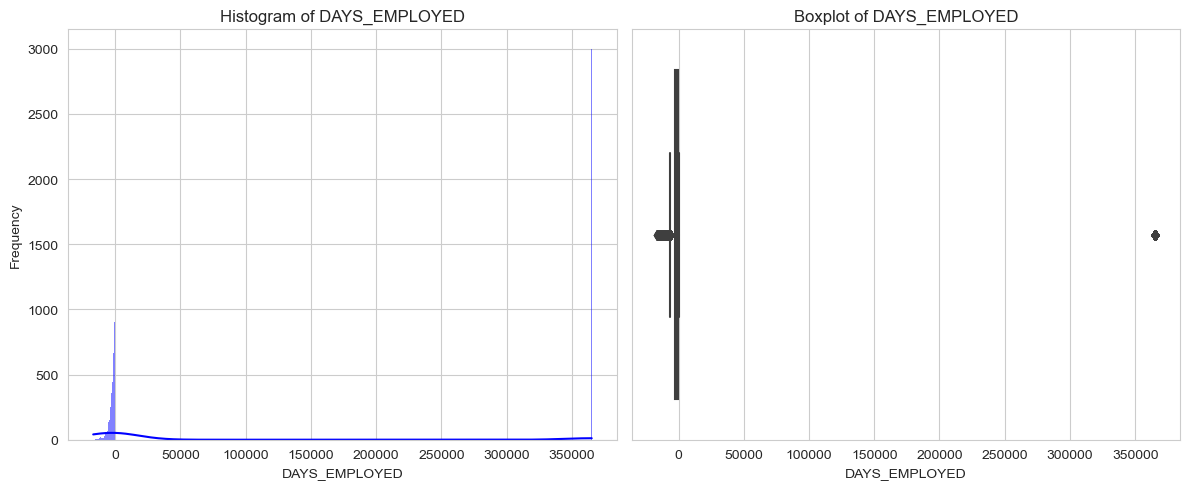

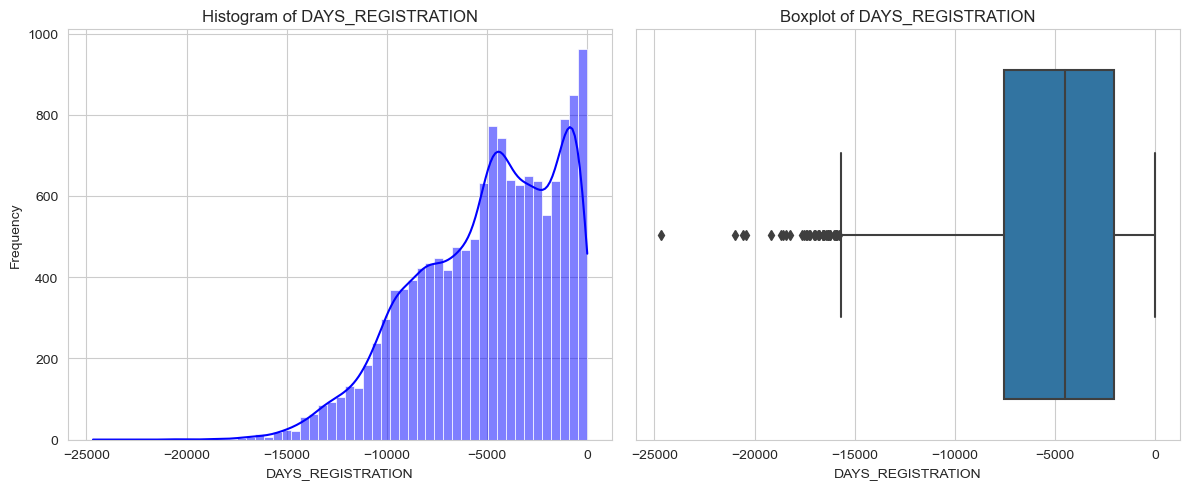

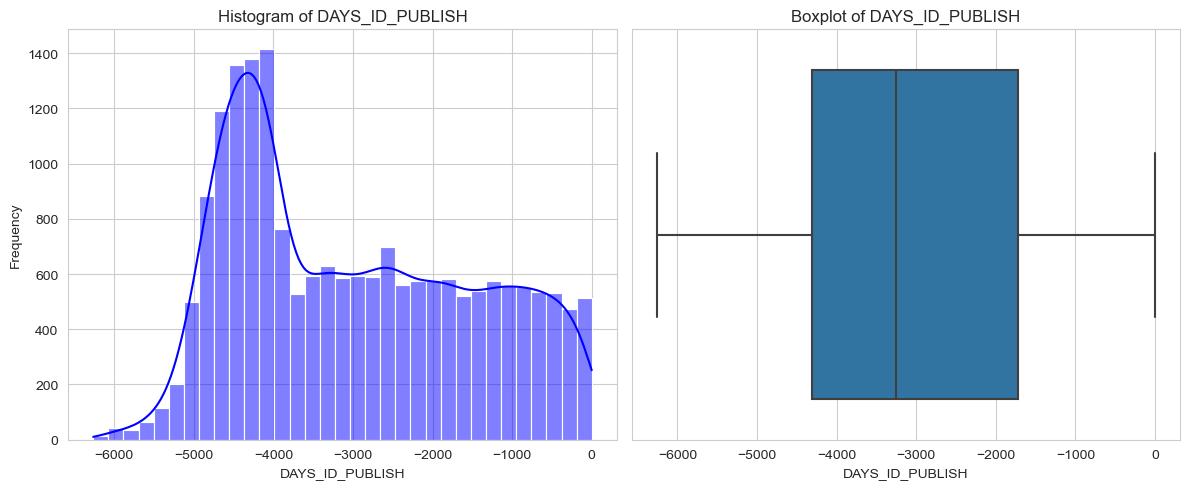

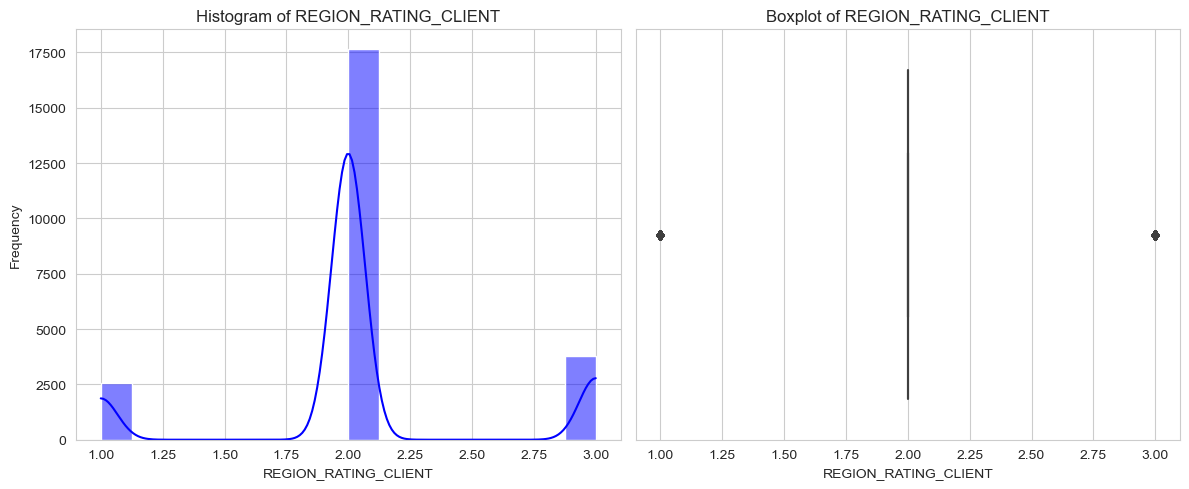

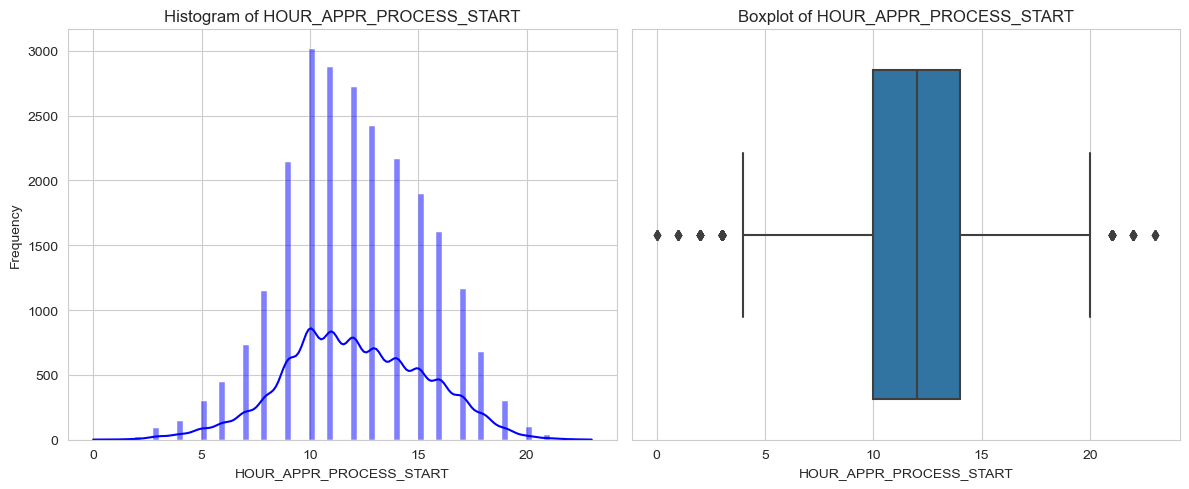

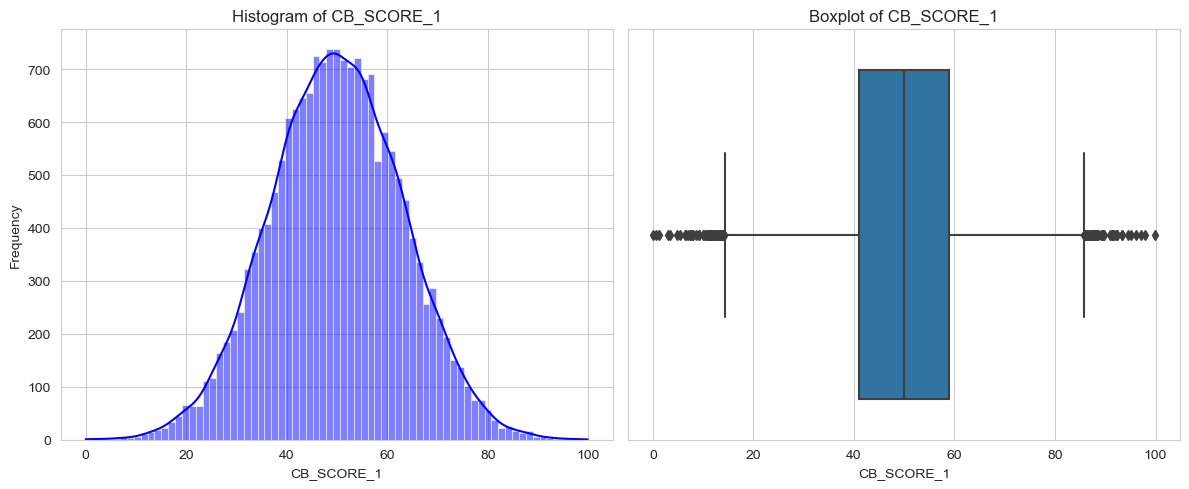

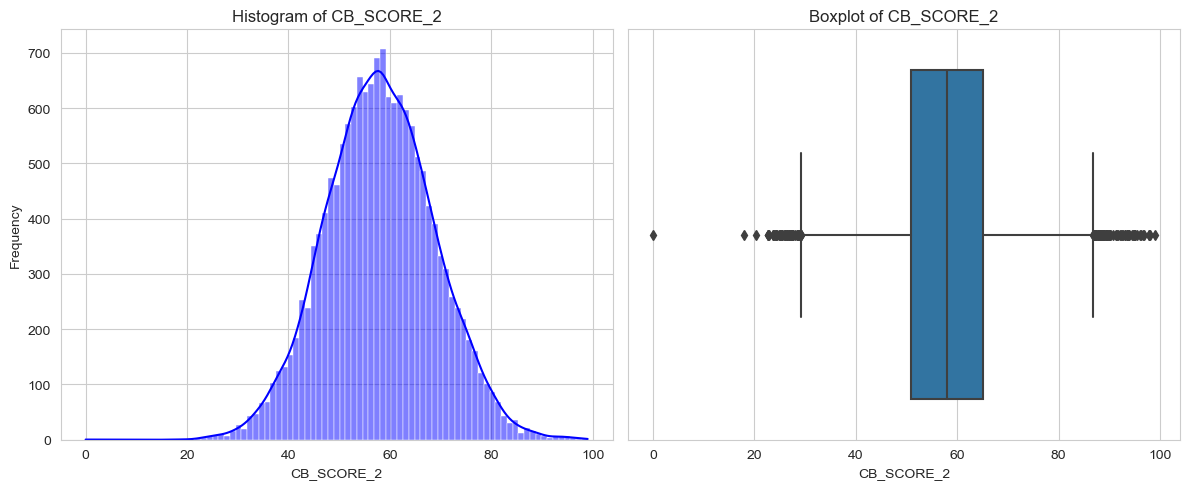

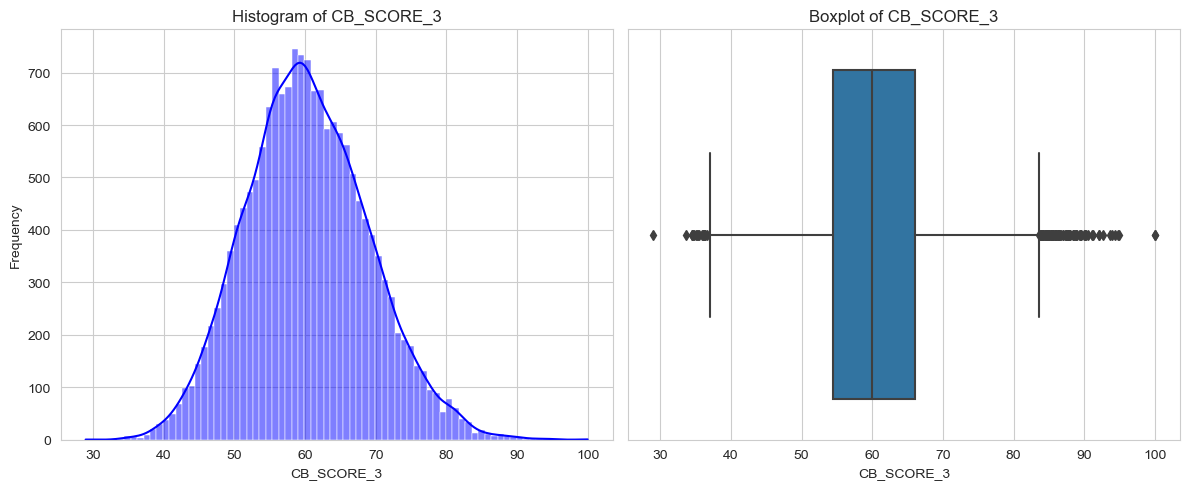

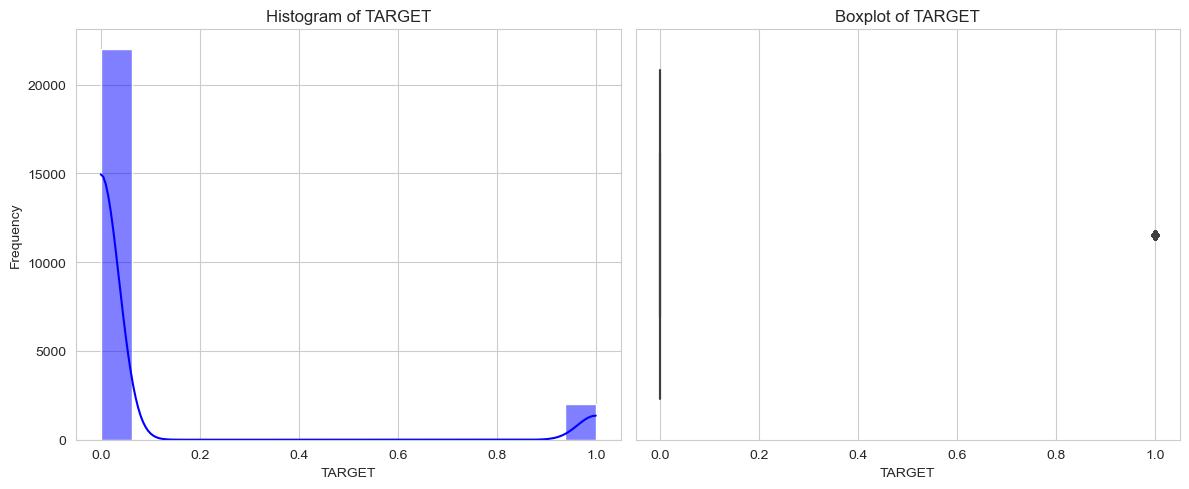

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set_style("whitegrid")  # 그리드를 추가한 흰 배경 스타일

custom_palette = ["blue", "red"]

for column in numeric_columns[1:]:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

    # 히스토그램 그리기
    sns.histplot(data=data, x=column, kde=True, ax=axes[0], color=custom_palette[0])
    axes[0].set_title(f'Histogram of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    # 상자 그림 그리기
    sns.boxplot(data=data, x=column, ax=axes[1])
    axes[1].set_title(f'Boxplot of {column}')
    axes[1].set_xlabel(column)

    plt.tight_layout()
    plt.show()

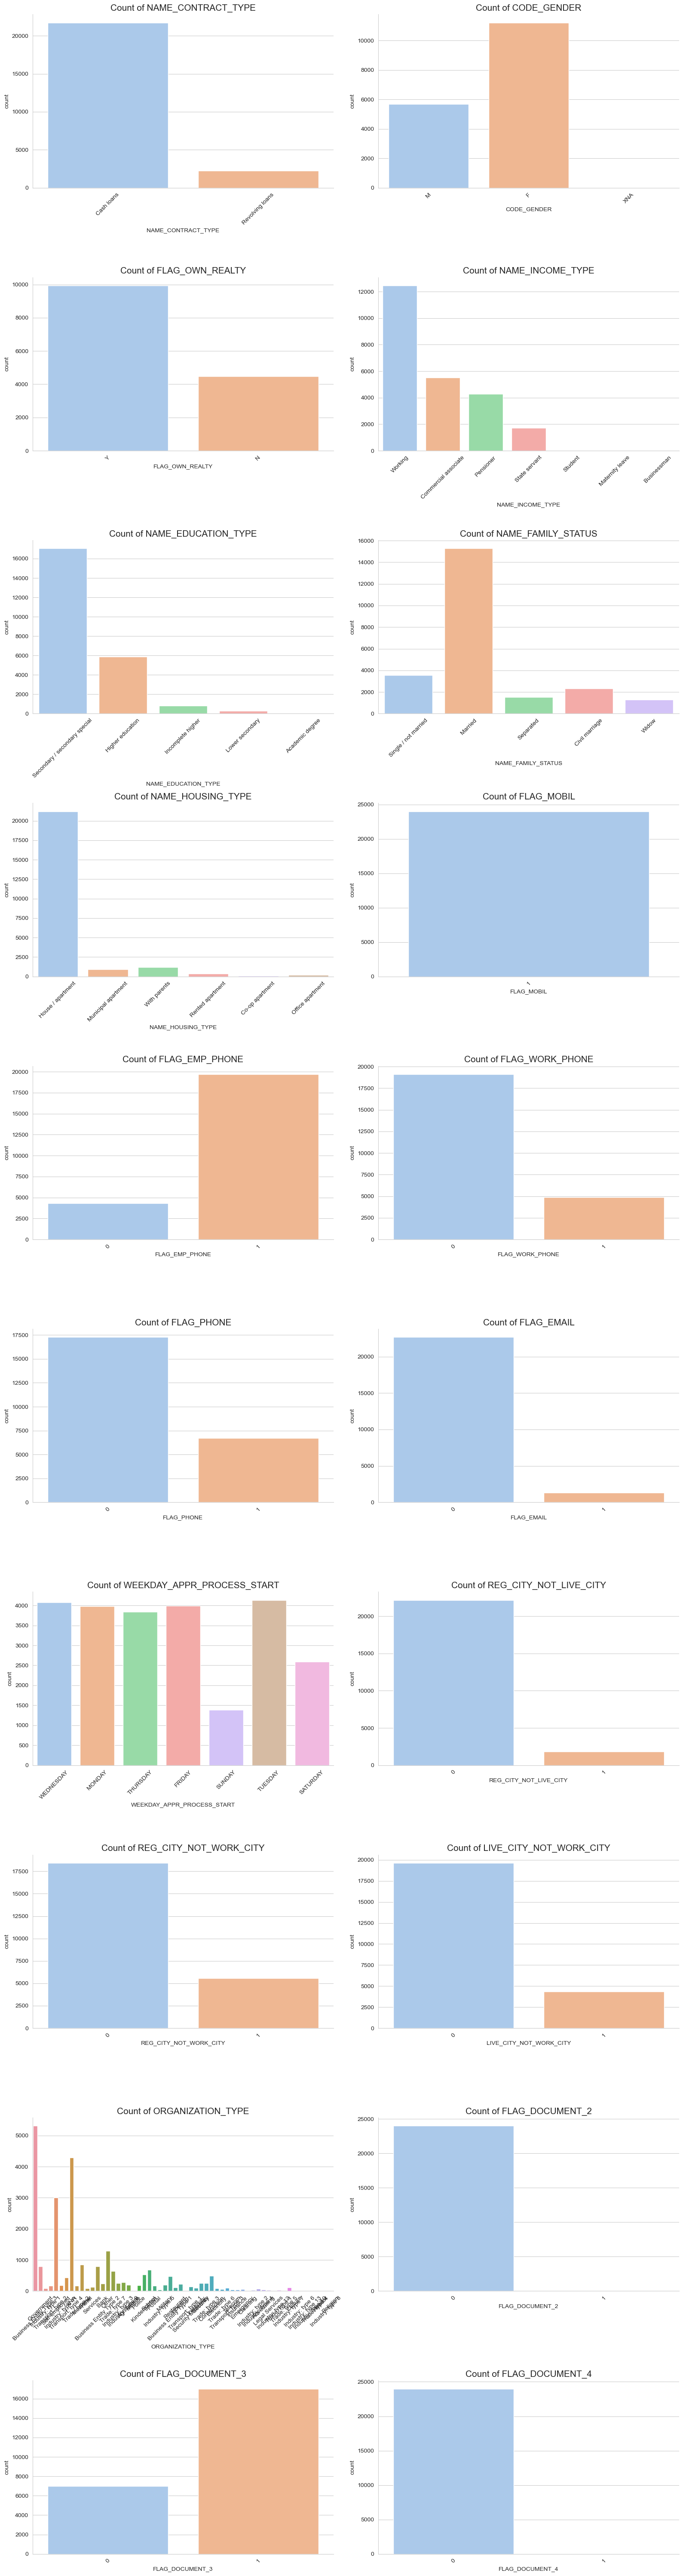

In [24]:
# 범주형 변수 시각화 (막대 그래프)

sns.set_style("whitegrid")
sns.set_palette("pastel")


# Calculate the number of rows needed for the plot
n_rows = (len(categorical_columns) + 1) // 2

fig, axes = plt.subplots(n_rows, 2, figsize=(16, n_rows*6))

for idx in range(n_rows * 2):
    i = idx // 2
    j = idx % 2
    
    # Skip if there's no data for this subplot
    if idx >= len(categorical_columns):
        fig.delaxes(axes[i,j]) # delete the empty subplot
        continue
    
    column = categorical_columns[idx]
    
    # Create the countplot on designated subplot (axes[i,j])
    sns.countplot(x=data[column], data=data, ax=axes[i,j])
    
    # Set the title and labels of the graph
    axes[i,j].set_title(f'Count of {column}', fontsize=15)
    
    # Rotate x-axis labels for better visibility if necessary
    axes[i,j].tick_params(axis='x', rotation=45)

# Remove top and right borders for cleaner look & adjust layout for better visibility 
sns.despine()
plt.tight_layout()

plt.show()

## 파생변수 만들기

In [22]:
FILLED_DATA_ADJ = FILLED_DATA.copy()

In [23]:
FILLED_DATA_ADJ['AGE'] = round(FILLED_DATA_ADJ['DAYS_BIRTH'] / 365)*-1
FILLED_DATA_ADJ['AGE']

0        26.0
1        52.0
2        35.0
3        31.0
4        46.0
         ... 
23995    52.0
23996    33.0
23997    41.0
23998    38.0
23999    35.0
Name: AGE, Length: 24000, dtype: float64

In [24]:
FILLED_DATA_ADJ['YEARS_EMPLOYED'] = round(FILLED_DATA_ADJ['DAYS_EMPLOYED'] / 365)*-1
FILLED_DATA_ADJ['YEARS_EMPLOYED']

0         2.0
1        11.0
2         5.0
3         2.0
4         1.0
         ... 
23995     9.0
23996     5.0
23997     6.0
23998     9.0
23999     6.0
Name: YEARS_EMPLOYED, Length: 24000, dtype: float64

In [25]:
FILLED_DATA_ADJ['DAYS_REGISTRATION_MONTH'] = round(FILLED_DATA_ADJ['DAYS_REGISTRATION'] / 30)*-1
FILLED_DATA_ADJ['DAYS_REGISTRATION_MONTH']

0        122.0
1        142.0
2        138.0
3          4.0
4        220.0
         ...  
23995    196.0
23996      4.0
23997    143.0
23998    116.0
23999    132.0
Name: DAYS_REGISTRATION_MONTH, Length: 24000, dtype: float64

In [26]:
FILLED_DATA_ADJ['MONTH_EMPLOYED'] = round(FILLED_DATA_ADJ['DAYS_EMPLOYED'] / 30)*-1
FILLED_DATA_ADJ['MONTH_EMPLOYED']

0         21.0
1        132.0
2         67.0
3         25.0
4         16.0
         ...  
23995    115.0
23996     65.0
23997     72.0
23998    104.0
23999     69.0
Name: MONTH_EMPLOYED, Length: 24000, dtype: float64

In [27]:
FILLED_DATA_ADJ['DAYS_ID_PUBLISH_YEARS'] = round(FILLED_DATA_ADJ['DAYS_ID_PUBLISH'] / 30)*-1
FILLED_DATA_ADJ['DAYS_ID_PUBLISH_YEARS']

0         71.0
1         84.0
2        129.0
3         99.0
4         17.0
         ...  
23995     89.0
23996     98.0
23997    136.0
23998    160.0
23999      1.0
Name: DAYS_ID_PUBLISH_YEARS, Length: 24000, dtype: float64

In [28]:
# 국내 DSR과 유사한 개념


FILLED_DATA_ADJ['ANNUITY_INCOME_PERCENT'] = (FILLED_DATA_ADJ['AMT_CREDIT'] / FILLED_DATA_ADJ['AMT_INCOME_TOTAL']) * 10
FILLED_DATA_ADJ['ANNUITY_INCOME_PERCENT']

0        32.776040
1        20.000000
2        47.185417
3        47.281838
4        29.834667
           ...    
23995    53.821639
23996    72.672000
23997    73.751333
23998    39.366250
23999    19.596713
Name: ANNUITY_INCOME_PERCENT, Length: 24000, dtype: float64

In [29]:
FILLED_DATA_ADJ['AVG_CB_SCORE'] = (FILLED_DATA_ADJ['CB_SCORE_1'] + FILLED_DATA_ADJ['CB_SCORE_2'] + FILLED_DATA_ADJ['CB_SCORE_3'])/3
FILLED_DATA_ADJ['AVG_CB_SCORE']

0        56.584331
1        43.511234
2        58.307834
3        65.688910
4        61.465172
           ...    
23995    58.832131
23996    61.127202
23997    48.188392
23998    53.775685
23999    59.888877
Name: AVG_CB_SCORE, Length: 24000, dtype: float64

In [30]:
FILLED_DATA_ADJ['CUST_REG_INFO_FLAG'] = FILLED_DATA_ADJ['FLAG_EMP_PHONE'] | FILLED_DATA_ADJ['FLAG_WORK_PHONE'] | FILLED_DATA_ADJ['FLAG_PHONE'] | FILLED_DATA_ADJ['FLAG_EMAIL']
FILLED_DATA_ADJ

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,...,CB_SCORE_3_predicted_flag,ORGANIZATION_TYPE_predicted_flag,AGE,YEARS_EMPLOYED,DAYS_REGISTRATION_MONTH,MONTH_EMPLOYED,DAYS_ID_PUBLISH_YEARS,ANNUITY_INCOME_PERCENT,AVG_CB_SCORE,CUST_REG_INFO_FLAG
0,100002,Cash loans,M,Y,0,202500.0,6.637148e+05,Working,Secondary / secondary special,Single / not married,...,N,N,26.0,2.0,122.0,21.0,71.0,32.776040,56.584331,True
1,100004,Revolving loans,F,Y,0,67500.0,1.350000e+05,Working,Secondary / secondary special,Single / not married,...,N,N,52.0,11.0,142.0,132.0,84.0,20.000000,43.511234,True
2,100020,Cash loans,M,N,0,108000.0,5.096025e+05,Working,Secondary / secondary special,Married,...,Y,N,35.0,5.0,138.0,67.0,129.0,47.185417,58.307834,True
3,100029,Cash loans,M,N,2,135000.0,6.383048e+05,Working,Secondary / secondary special,Married,...,N,N,31.0,2.0,4.0,25.0,99.0,47.281838,65.688910,True
4,100048,Cash loans,M,Y,0,202500.0,6.041520e+05,Working,Secondary / secondary special,Married,...,Y,N,46.0,1.0,220.0,16.0,17.0,29.834667,61.465172,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,456095,Cash loans,F,Y,0,135000.0,7.265921e+05,Pensioner,Higher education,Married,...,N,Y,52.0,9.0,196.0,115.0,89.0,53.821639,58.832131,False
23996,456117,Cash loans,F,N,1,67500.0,4.905360e+05,Working,Secondary / secondary special,Married,...,N,N,33.0,5.0,4.0,65.0,98.0,72.672000,61.127202,True
23997,456118,Cash loans,M,Y,0,135000.0,9.956430e+05,Working,Higher education,Married,...,N,N,41.0,6.0,143.0,72.0,136.0,73.751333,48.188392,True
23998,456142,Cash loans,F,Y,1,360000.0,1.417185e+06,Working,Higher education,Single / not married,...,N,N,38.0,9.0,116.0,104.0,160.0,39.366250,53.775685,True


In [31]:
FILLED_DATA_ADJ['IS_SINGLE_PARENT'] = 'N'
FILLED_DATA_ADJ.loc[((FILLED_DATA_ADJ['NAME_FAMILY_STATUS'] == 'Single / not married') | 
                     (FILLED_DATA_ADJ['NAME_FAMILY_STATUS'] == 'Widow')) & 
                     (FILLED_DATA_ADJ['CNT_CHILDREN'] > 0), 'IS_SINGLE_PARENT'] = 'Y'
FILLED_DATA_ADJ['IS_SINGLE_PARENT']

0        N
1        N
2        N
3        N
4        N
        ..
23995    N
23996    N
23997    N
23998    Y
23999    N
Name: IS_SINGLE_PARENT, Length: 24000, dtype: object

In [32]:
FILLED_DATA_ADJ['MIN_CB_SCORE'] =FILLED_DATA_ADJ[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].min(axis=1)
FILLED_DATA_ADJ['MIN_CB_SCORE']

0        55.145725
1        26.499494
2        51.859791
3        45.996152
4        58.773720
           ...    
23995    55.568876
23996    51.115667
23997    40.231662
23998    50.734878
23999    50.173294
Name: MIN_CB_SCORE, Length: 24000, dtype: float64

In [33]:
FILLED_DATA_ADJ['MEDIAN_CB_SCORE'] =FILLED_DATA_ADJ[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].median(axis=1)
FILLED_DATA_ADJ['MEDIAN_CB_SCORE']

0        56.258045
1        46.433666
2        59.567341
3        68.694333
4        59.421810
           ...    
23995    56.609319
23996    52.461067
23997    51.533905
23998    50.884403
23999    58.329626
Name: MEDIAN_CB_SCORE, Length: 24000, dtype: float64

In [34]:
FILLED_DATA_ADJ['STD_CB_SCORE'] =FILLED_DATA_ADJ[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].std(axis=1)
FILLED_DATA_ADJ['STD_CB_SCORE']

0         1.626483
1        15.755134
2         5.919650
3        18.375316
4         4.113253
           ...    
23995     4.779470
23996    16.189318
23997     6.919731
23998     5.137883
23999    10.581722
Name: STD_CB_SCORE, Length: 24000, dtype: float64

In [35]:
FILLED_DATA_ADJ['MAX_CB_SCORE'] =FILLED_DATA_ADJ[['CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3']].max(axis=1)
FILLED_DATA_ADJ['MAX_CB_SCORE']

0        58.349224
1        57.600542
2        63.496369
3        82.376245
4        66.199985
           ...    
23995    64.318198
23996    79.804871
23997    52.799610
23998    59.707773
23999    71.163710
Name: MAX_CB_SCORE, Length: 24000, dtype: float64

In [36]:
FILLED_DATA_ADJ['WEEKEND_APPR_PROCESS_START'] = 'N'
FILLED_DATA_ADJ.loc[(FILLED_DATA_ADJ['WEEKDAY_APPR_PROCESS_START'] == 'SUNDAY') | 
                     (FILLED_DATA_ADJ['WEEKDAY_APPR_PROCESS_START'] == 'SATURDAY'), 'WEEKEND_APPR_PROCESS_START'] = 'Y'
FILLED_DATA_ADJ['WEEKEND_APPR_PROCESS_START']

0        N
1        N
2        N
3        N
4        N
        ..
23995    Y
23996    N
23997    N
23998    N
23999    N
Name: WEEKEND_APPR_PROCESS_START, Length: 24000, dtype: object

In [37]:
# 아이수 대비 소득

FILLED_DATA_ADJ['CHILDREN_INCOME_PERCENT'] = (FILLED_DATA_ADJ['AMT_INCOME_TOTAL'] / (FILLED_DATA_ADJ['CNT_CHILDREN']+1)) * 10
FILLED_DATA_ADJ['CHILDREN_INCOME_PERCENT']

0        2025000.0
1         675000.0
2        1080000.0
3         450000.0
4        2025000.0
           ...    
23995    1350000.0
23996     337500.0
23997    1350000.0
23998    1800000.0
23999    5400000.0
Name: CHILDREN_INCOME_PERCENT, Length: 24000, dtype: float64

In [38]:
# 일한 기간 대비 나이

FILLED_DATA_ADJ['DAYS_EMPLOYED_PERCENT'] = (FILLED_DATA_ADJ['DAYS_EMPLOYED'] / FILLED_DATA_ADJ['DAYS_BIRTH']) * 100
FILLED_DATA_ADJ['DAYS_EMPLOYED_PERCENT']

0         6.732903
1        20.857706
2        15.478804
3         6.609959
4         2.799590
           ...    
23995    18.095011
23996    16.086385
23997    14.232465
23998    22.353679
23999    16.015931
Name: DAYS_EMPLOYED_PERCENT, Length: 24000, dtype: float64

In [39]:
FILLED_DATA_ADJ = FILLED_DATA_ADJ.astype({'CUST_REG_INFO_FLAG': object, 'WEEKEND_APPR_PROCESS_START' : object, })

## 데이터 저장

In [41]:
# import pickle
# # 데이터 저장
# with open('FILLED_DATA_ADJ.pkl', 'wb') as f:
#     pickle.dump(FILLED_DATA_ADJ, f)

# with open('FILLED_DATA.pkl', 'wb') as f:
#     pickle.dump(FILLED_DATA, f)

### pickle data 호출

In [16]:
FILLED_DATA = pd.read_pickle('filled_data_vf.pkl')
FILLED_DATA

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET,CODE_GENDER_predicted_flag,FLAG_OWN_REALTY_predicted_flag,AMT_CREDIT_predicted_flag,REGION_POPULATION_RELATIVE_predicted_flag,DAYS_BIRTH_predicted_flag,DAYS_EMPLOYED_predicted_flag,DAYS_REGISTRATION_predicted_flag,DAYS_ID_PUBLISH_predicted_flag,CB_SCORE_1_predicted_flag,CB_SCORE_2_predicted_flag,CB_SCORE_3_predicted_flag,ORGANIZATION_TYPE_predicted_flag
0,Cash loans,M,Y,0,202500.0,6.109991e+05,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.000000,-637.000000,-3648.000000,-2120.000000,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,56.050804,55.684040,58.349224,1,N,N,Y,N,N,N,N,N,Y,Y,N,N
1,Revolving loans,F,Y,0,67500.0,1.350000e+05,Working,Secondary / secondary special,Single / not married,House / apartment,0.020331,-19046.000000,-3670.841797,-4260.000000,-2531.000000,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0,Y,Y,N,Y,N,Y,N,N,N,N,N,N
2,Cash loans,M,N,0,108000.0,5.096025e+05,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.000000,-1711.227661,-3676.653076,-3866.000000,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,50.768211,63.496369,59.647892,0,N,N,N,N,N,Y,Y,N,Y,N,Y,N
3,Cash loans,M,N,2,135000.0,5.696132e+05,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.000000,-746.000000,-108.000000,-2614.034668,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0,N,N,Y,N,N,N,N,Y,N,N,N,N
4,Cash loans,M,Y,0,202500.0,6.041520e+05,Working,Secondary / secondary special,Married,House / apartment,0.009175,-15373.619141,-475.000000,-4625.421875,-513.000000,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,56.640289,58.929722,0,Y,N,N,N,Y,N,Y,N,N,Y,Y,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Cash loans,F,Y,0,135000.0,6.702981e+05,Pensioner,Higher education,Married,House / apartment,0.019777,-19105.000000,-3533.291260,-5672.696777,-2662.000000,0,0,0,0,2,SUNDAY,10,0,0,0,Other,0,1,0,55.568876,64.318198,56.609319,0,Y,Y,Y,Y,N,Y,Y,N,N,N,N,Y
23996,Cash loans,F,N,1,67500.0,4.905360e+05,Working,Secondary / secondary special,Married,House / apartment,0.003813,-12183.000000,-1693.639282,-106.000000,-3110.885010,1,1,1,0,2,MONDAY,12,0,0,0,Business Entity Type 3,0,1,0,79.804871,52.277538,51.115667,0,Y,N,N,N,N,Y,N,Y,N,Y,N,N
23997,Cash loans,M,Y,0,135000.0,9.956430e+05,Working,Higher education,Married,House / apartment,0.019005,-14876.369141,-1893.323853,-3909.970703,-4095.000000,1,0,0,0,2,FRIDAY,14,0,0,0,Business Entity Type 3,0,1,0,40.231662,51.782478,51.533905,0,N,N,N,Y,Y,Y,Y,N,N,Y,N,N
23998,Cash loans,F,Y,1,360000.0,1.417185e+06,Working,Higher education,Single / not married,House / apartment,0.018029,-14010.000000,-2987.366455,-3107.889648,-4796.000000,1,1,0,0,3,FRIDAY,11,0,1,1,School,0,1,0,50.734878,47.338902,59.707773,0,Y,Y,N,N,N,Y,Y,N,N,Y,N,N


In [17]:
FILLED_DATA_ADJ = pd.read_pickle('filled_data_adj_vf.pkl')
FILLED_DATA_ADJ

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,CB_SCORE_1,CB_SCORE_2,CB_SCORE_3,TARGET,CODE_GENDER_predicted_flag,FLAG_OWN_REALTY_predicted_flag,AMT_CREDIT_predicted_flag,REGION_POPULATION_RELATIVE_predicted_flag,DAYS_BIRTH_predicted_flag,DAYS_EMPLOYED_predicted_flag,DAYS_REGISTRATION_predicted_flag,DAYS_ID_PUBLISH_predicted_flag,CB_SCORE_1_predicted_flag,CB_SCORE_2_predicted_flag,CB_SCORE_3_predicted_flag,ORGANIZATION_TYPE_predicted_flag,AGE,DAYS_REGISTRATION_MONTH,MONTH_EMPLOYED,DAYS_ID_PUBLISH_MONTH,ANNUITY_INCOME_PERCENT,AVG_CB_SCORE,CUST_REG_INFO_FLAG,CUST_REG_INFO_FLAG2,IS_SINGLE_PARENT,MIN_CB_SCORE,MEDIAN_CB_SCORE,STD_CB_SCORE,MAX_CB_SCORE,WEEKEND_APPR_PROCESS_START,CHILDREN_INCOME_PERCENT,DAYS_EMPLOYED_PERCENT,DAYS_BIRTH_SQUARE,Grouped_ORGANIZATION_TYPE,TIME_CATEGORY
0,Cash loans,M,Y,0,202500.0,6.109991e+05,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461.000000,-637.000000,-3648.000000,-2120.000000,1,0,1,0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,0,1,0,56.050804,55.684040,58.349224,1,N,N,Y,N,N,N,N,N,Y,Y,N,N,26.0,122.0,21.0,71.0,3.017280,56.694689,True,True,N,55.684040,56.050804,1.444556,58.349224,N,2025000.0,6.732903,8.951052e+07,Group_5,Weekday_Morning
1,Revolving loans,F,Y,0,67500.0,1.350000e+05,Working,Secondary / secondary special,Single / not married,House / apartment,0.020331,-19046.000000,-3670.841797,-4260.000000,-2531.000000,1,1,1,0,2,MONDAY,9,0,0,0,Government,0,0,0,26.499494,57.600542,46.433666,0,Y,Y,N,Y,N,Y,N,N,N,N,N,N,52.0,142.0,122.0,84.0,2.000000,43.511234,True,True,N,26.499494,46.433666,15.755134,57.600542,N,675000.0,19.273558,3.627501e+08,Group_4,Weekday_Morning
2,Cash loans,M,N,0,108000.0,5.096025e+05,Working,Secondary / secondary special,Married,House / apartment,0.018634,-12931.000000,-1711.227661,-3676.653076,-3866.000000,1,0,0,0,2,THURSDAY,12,1,1,0,Government,0,1,0,50.768211,63.496369,59.647892,0,N,N,N,N,N,Y,Y,N,Y,N,Y,N,35.0,123.0,57.0,129.0,4.718542,57.970824,False,True,N,50.768211,59.647892,6.527704,63.496369,N,1080000.0,13.233529,1.672108e+08,Group_4,Weekday_lunch
3,Cash loans,M,N,2,135000.0,5.696132e+05,Working,Secondary / secondary special,Married,House / apartment,0.026392,-11286.000000,-746.000000,-108.000000,-2614.034668,1,0,0,0,2,THURSDAY,14,0,1,1,Business Entity Type 3,0,1,0,82.376245,45.996152,68.694333,0,N,N,Y,N,N,N,N,Y,N,N,N,N,31.0,4.0,25.0,87.0,4.219357,65.688910,False,True,N,45.996152,68.694333,18.375316,82.376245,N,450000.0,6.609959,1.273738e+08,Group_5,Weekday_afternoon
4,Cash loans,M,Y,0,202500.0,6.041520e+05,Working,Secondary / secondary special,Married,House / apartment,0.009175,-15373.619141,-475.000000,-4625.421875,-513.000000,1,0,1,0,2,MONDAY,12,0,1,1,Industry: type 1,0,1,0,66.199985,56.640289,58.929722,0,Y,N,N,N,Y,N,Y,N,N,Y,Y,N,42.0,154.0,16.0,17.0,2.983467,60.589999,True,True,N,56.640289,58.929722,4.991426,66.199985,N,2025000.0,3.089708,2.363482e+08,Group_7,Weekday_lunch
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,Cash loans,F,Y,0,135000.0,6.702981e+05,Pensioner,Higher education,Married,House / apartment,0.019777,-19105.000000,-3533.291260,-5672.696777,-2662.000000,0,0,0,0,2,SUNDAY,10,0,0,0,Other,0,1,0,55.568876,64.318198,56.609319,0,Y,Y,Y,Y,N,Y,Y,N,N,N,N,Y,52.0,189.0,118.0,89.0,4.965171,58.832131,False,False,N,55.568876,56.609319,4.779470,64.318198,Y,1350

# 최종 생성 모델

## DNN 딥러닝 방식

In [18]:
numeric_columns,categorical_columns,missing_values = columns_classification(FILLED_DATA)


total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

### 연체 고객을 맞추는 것이 더 중요함으로 모델 튜닝
 
#### loss 함수 변경, class 가중치 부여, Threshold 값 수정

In [19]:
from sklearn.utils import class_weight
# Compute the class weights
# class_weights = class_weight.compute_class_weight(class_weight= 'balanced', classes=np.unique(y_train), y=y_train)

# class_weights[1] = class_weights[1] * 0.5

# class_weights = {i: val for i, val in enumerate(class_weights)}
# class_weights

In [20]:
# weight주는건데 수정해보기
from tensorflow import keras
import tensorflow.keras.backend as K



def custom_loss(y_true, y_pred):
    # Calculate binary crossentropy loss
    bce = keras.losses.BinaryCrossentropy()
    base_loss = bce(y_true, y_pred)
    
    # Define weight for false positives
    fp_weight = 1
    fn_weight = 20
    
    # Add extra penalty for false positives
    y_pred_rounded = K.round(y_pred)
    fp_penalty = fp_weight * K.mean(K.cast(1 - y_true, 'float32') * K.cast(y_pred_rounded, 'float32'))
    fn_penalty = fn_weight * K.mean(K.cast(y_true,'float32') * K.cast(1 - y_pred_rounded,'float32'))
    
    return base_loss + fp_penalty  + fn_penalty

### over sampling 적용

In [21]:
from imblearn.over_sampling import SMOTENC

def over_sampling(x,y):
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X, y)
    return X_res, y_res

# X_res, Y_res = over_sampling(X_train_dense,y)

### 딥러닝 모델 학습

In [22]:
import tensorflow.keras.backend as K

def specificity(y_true, y_pred):
    true_negatives = K.sum(K.round(K.clip((1 - y_true) * (1 - y_pred), 0, 1)))
    possible_negatives = K.sum(K.round(K.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + K.epsilon())

In [23]:

from sklearn.compose import make_column_transformer

# 안쓸 컬럼 정의
columns_to_exclude = ['SK_ID_CURR','TARGET']

input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
input_numeric_columns

# Preprocessing for numerical data:
numerical_transformer = StandardScaler()

# Preprocessing for categorical data:
categorical_transformer = OneHotEncoder(drop='first')

preprocessor = make_column_transformer(
    (numerical_transformer, input_numeric_columns),
    (categorical_transformer, categorical_columns)
)

X = FILLED_DATA[input_numeric_columns + categorical_columns]
y = FILLED_DATA['TARGET']



X_train_preprocessed= preprocessor.fit_transform(X)

X_train_dense = X_train_preprocessed.toarray()



X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_train_dense,y,test_size=0.3 ,random_state=42)




n_input_features=X_train_dense.shape[1]

In [24]:
# AUC METRIC만 출력

# dnn_model = tf.keras.Sequential([
#     tf.keras.layers.Input(shape=(n_input_features,)),
#     tf.keras.layers.Dense(65, activation='relu'),
#     tf.keras.layers.Dropout(0.5),  # Dropout 추가
#     tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.001)),
#     tf.keras.layers.Dropout(0.5),  # Dropout 추가
#     tf.keras.layers.Dense(32, activation='relu'),
#     tf.keras.layers.Dense(1, activation='sigmoid')  # 선형 활성화 함수 사용
# ])
# dnn_model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=[tf.keras.metrics.AUC()])


In [25]:
# 다양한 METRIC 출력, metric 파라미터는 학습에 영향을 주지 않음을 확인함.
# 학습에 영향을 주고 싶다면 3가지 방안이 있음 
# loss 함수 변경, class 가중치 부여, Threshold 값 수정
#loss=custom_loss,


dnn_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(n_input_features,)),
    tf.keras.layers.Dense(64, activation='relu'),
    BatchNormalization(),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(32, activation='tanh'),
    BatchNormalization(),
    tf.keras.layers.Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dropout(0.5),  # Dropout 추가
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Dropout 추가
    BatchNormalization(),
    tf.keras.layers.Dense(1, activation='sigmoid')  # 선형 활성화 함수 사용
])


learning_rate = 0.0007  # Set your desired learning rate

optimizer = Adam(learning_rate=learning_rate)

dnn_model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', specificity])


#### 기본 모델

In [26]:

early_stopping_dnn = EarlyStopping(monitor='val_auc', patience=7, restore_best_weights=True)

dnn_model.fit(X_train_full, y_train, batch_size=20, epochs=30,
                  validation_data=(X_valid_full, y_valid), verbose=2,
                 callbacks=[early_stopping_dnn])

Epoch 1/30
840/840 - 8s - loss: 0.9558 - accuracy: 0.8188 - auc: 0.4960 - specificity: 0.8845 - val_loss: 0.3174 - val_accuracy: 0.9196 - val_auc: 0.5899 - val_specificity: 1.0000 - 8s/epoch - 10ms/step
Epoch 2/30
840/840 - 4s - loss: 0.3177 - accuracy: 0.9144 - auc: 0.5431 - specificity: 0.9984 - val_loss: 0.2850 - val_accuracy: 0.9196 - val_auc: 0.6016 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 3/30
840/840 - 4s - loss: 0.2966 - accuracy: 0.9158 - auc: 0.5628 - specificity: 1.0000 - val_loss: 0.2761 - val_accuracy: 0.9196 - val_auc: 0.6708 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 4/30
840/840 - 4s - loss: 0.2894 - accuracy: 0.9158 - auc: 0.5991 - specificity: 1.0000 - val_loss: 0.2704 - val_accuracy: 0.9196 - val_auc: 0.6984 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 5/30
840/840 - 4s - loss: 0.2837 - accuracy: 0.9158 - auc: 0.6343 - specificity: 1.0000 - val_loss: 0.2678 - val_accuracy: 0.9196 - val_auc: 0.6978 - val_specificity: 1.0000 - 4s/epoch 

#### calss 가중치

In [185]:
dnn_model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC', specificity])


early_stopping_dnn = EarlyStopping(monitor='val_auc', patience=5)

dnn_model.fit(X_train_full, y_train, batch_size=25, epochs=10,
                  validation_data=(X_valid_full, y_valid), verbose=2,
               class_weight=class_weights,
                 callbacks=[early_stopping_dnn])


Epoch 1/10
672/672 - 5s - loss: 0.4375 - accuracy: 0.7665 - auc: 0.7809 - specificity: 0.7805 - val_loss: 0.3938 - val_accuracy: 0.7960 - val_auc: 0.6989 - val_specificity: 0.8286 - 5s/epoch - 7ms/step
Epoch 2/10
672/672 - 3s - loss: 0.4417 - accuracy: 0.7730 - auc: 0.7761 - specificity: 0.7895 - val_loss: 0.3944 - val_accuracy: 0.7983 - val_auc: 0.6976 - val_specificity: 0.8325 - 3s/epoch - 5ms/step
Epoch 3/10
672/672 - 3s - loss: 0.4349 - accuracy: 0.7770 - auc: 0.7846 - specificity: 0.7932 - val_loss: 0.4019 - val_accuracy: 0.8240 - val_auc: 0.6914 - val_specificity: 0.8706 - 3s/epoch - 5ms/step
Epoch 4/10
672/672 - 4s - loss: 0.4339 - accuracy: 0.7636 - auc: 0.7842 - specificity: 0.7768 - val_loss: 0.4001 - val_accuracy: 0.7932 - val_auc: 0.6922 - val_specificity: 0.8275 - 4s/epoch - 5ms/step
Epoch 5/10
672/672 - 4s - loss: 0.4371 - accuracy: 0.7752 - auc: 0.7837 - specificity: 0.7898 - val_loss: 0.3910 - val_accuracy: 0.8167 - val_auc: 0.6879 - val_specificity: 0.8587 - 4s/epoch -

#### custom loss
안되는듯..

In [168]:
dnn_model.compile(optimizer=optimizer,
              loss=custom_loss,
              metrics=['accuracy', 'AUC', specificity])
early_stopping_dnn = EarlyStopping(monitor='val_auc', patience=5)

dnn_model.fit(X_train_full, y_train, batch_size=20, epochs=10,
                  validation_data=(X_valid_full, y_valid), verbose=2,
               class_weight=class_weights,
                 callbacks=[early_stopping_dnn])

Epoch 1/10
840/840 - 6s - loss: 1.2929 - accuracy: 0.8619 - auc: 0.6703 - specificity: 0.9271 - val_loss: 1.8753 - val_accuracy: 0.9196 - val_auc: 0.6960 - val_specificity: 1.0000 - 6s/epoch - 7ms/step
Epoch 2/10
840/840 - 4s - loss: 1.3780 - accuracy: 0.9158 - auc: 0.7315 - specificity: 1.0000 - val_loss: 1.8740 - val_accuracy: 0.9196 - val_auc: 0.6978 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 3/10
840/840 - 4s - loss: 1.3800 - accuracy: 0.9158 - auc: 0.7394 - specificity: 1.0000 - val_loss: 1.8749 - val_accuracy: 0.9196 - val_auc: 0.6938 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 4/10
840/840 - 4s - loss: 1.3685 - accuracy: 0.9158 - auc: 0.7415 - specificity: 1.0000 - val_loss: 1.8759 - val_accuracy: 0.9196 - val_auc: 0.6961 - val_specificity: 1.0000 - 4s/epoch - 5ms/step
Epoch 5/10
840/840 - 5s - loss: 1.3692 - accuracy: 0.9158 - auc: 0.7382 - specificity: 1.0000 - val_loss: 1.8755 - val_accuracy: 0.9196 - val_auc: 0.6851 - val_specificity: 1.0000 - 5s/epoch -

225/225 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

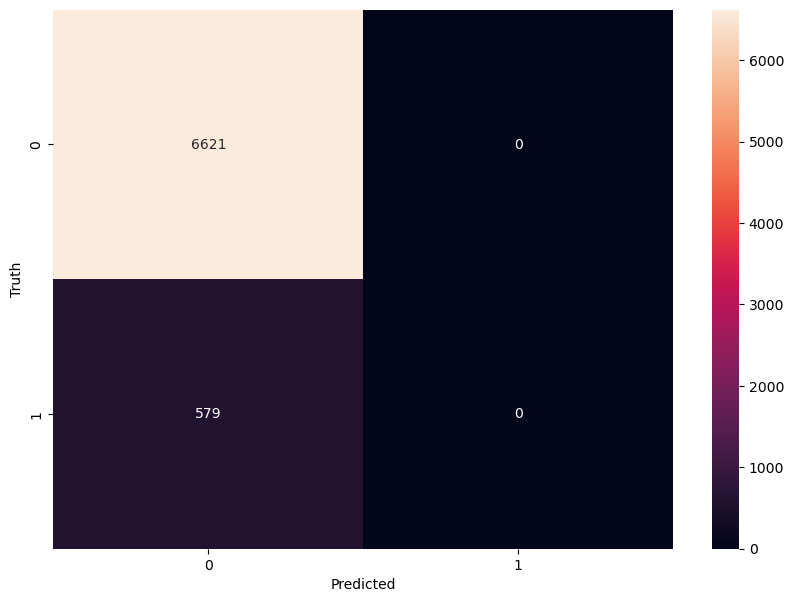

In [32]:
from sklearn.metrics import confusion_matrix
predictions = dnn_model.predict(X_valid_full)
predicted_classes = (predictions > 0.5).astype(int)
predicted_classes

cm = confusion_matrix(y_valid, predicted_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## 기본모델 평가

In [33]:
def Make_model_inputdata(Data):
    # 안쓸 컬럼 정의
    numeric_columns,categorical_columns,missing_values = columns_classification(Data)
    columns_to_exclude = ['SK_ID_CURR','TARGET']

    input_numeric_columns = [x for x in numeric_columns if x not in columns_to_exclude]
    input_numeric_columns


    X = Data[input_numeric_columns + categorical_columns].copy()
    y = Data['TARGET']

    # 범주형 변수 인코딩
    encoder = LabelEncoder()
    for col in categorical_columns:
        print(col)
        X[col] = encoder.fit_transform(X[col])

    # 데이터 스케일링
    scaler = StandardScaler()
    X[input_numeric_columns] = scaler.fit_transform(X[input_numeric_columns])


    # Split data into train and test sets
    X_train, X_valid, y_train, y_valid = train_test_split(X,y,test_size=0.3, random_state=42)
    
    return  X_train, X_valid, y_train, y_valid




In [34]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

# Train a RandomForest model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

# Train a SVM model
svm_model=SVC()
svm_model.fit(X_train,y_train)

# Train a LightGBM model
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)


# Train a XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train,y_train)

# Train a Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(n_estimators=100)
brf_model.fit(X_train,y_train)

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)




C:\Users\galaxy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

GradientBoostingClassifier()

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume that y_valid are the true labels and y_pred are the predicted labels.
y_pred_rf = random_forest_model.predict(X_valid)
y_pred_svm = svm_model.predict(X_valid)
y_pred_lgbm = lgbm_model.predict(X_valid)
y_pred_dnn = predicted_classes
y_pred_xgb = xgb_model.predict(X_valid)
y_pred_brf = brf_model.predict(X_valid)
y_pred_gb = gb_model.predict(X_valid)



models = ['Random Forest', 'lgbm', 'dnn', 'xgb', 'brf', 'gb']
predictions = [y_pred_rf, y_pred_lgbm,  y_pred_dnn, y_pred_xgb, y_pred_brf, y_pred_gb]

for i,model in enumerate(models):
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_valid,predictions[i]))
    print("Precision:", precision_score(y_valid,predictions[i]))
    print("Recall:", recall_score(y_valid,predictions[i]))
    print("F1-Score:", f1_score(y_valid,predictions[i]))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(model.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(model.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
        print()

Model: Random Forest
Accuracy: 0.9322222222222222
Precision: 1.0
Recall: 0.15716753022452504
F1-Score: 0.2716417910447761
AUC-ROC: 0.7828486531705916

Model: lgbm
Accuracy: 0.9383333333333334
Precision: 0.9090909090909091
Recall: 0.25906735751295334
F1-Score: 0.4032258064516129
AUC-ROC: 0.8393336322722568

Model: dnn
Accuracy: 0.9195833333333333
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Model: xgb
Accuracy: 0.9365277777777777
Precision: 0.8351648351648352
Recall: 0.26252158894645944
F1-Score: 0.39947437582128775
AUC-ROC: 0.8248645710161235

Model: brf
Accuracy: 0.7263888888888889
Precision: 0.18657052726453358
Recall: 0.7150259067357513
F1-Score: 0.29592566118656183


C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC-ROC: 0.8103945967702597

Model: gb
Accuracy: 0.9341666666666667
Precision: 0.9007633587786259
Recall: 0.20379965457685664
F1-Score: 0.3323943661971831
AUC-ROC: 0.8192010348608174



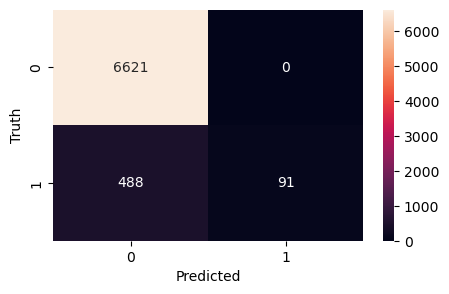

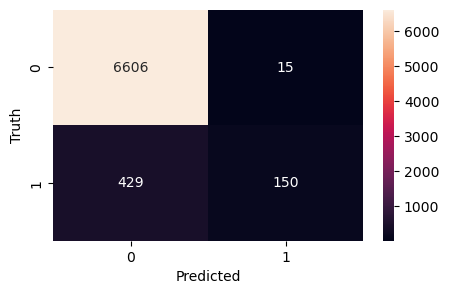

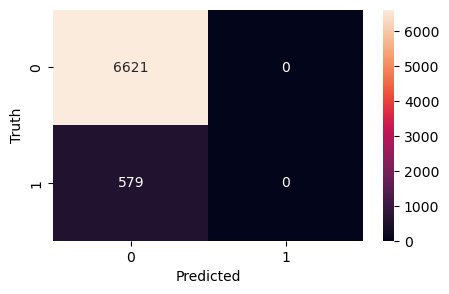

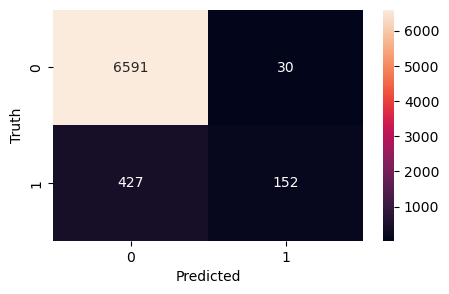

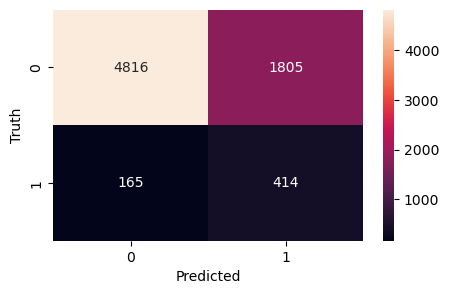

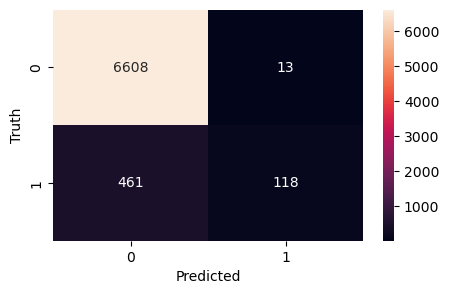

In [37]:
for i in predictions:
    cm = confusion_matrix(y_valid, i)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

### 파생변수 포함

In [42]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'DAYS_BIRTH_SQUARE']
categorical_columns : 36
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_fla

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
import xgboost as xgb

# Train a RandomForest model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

# Train a SVM model
svm_model=SVC()
svm_model.fit(X_train,y_train)

# Train a LightGBM model
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)


# Train a XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train,y_train)

# Train a Balanced Random Forest model
brf_model = BalancedRandomForestClassifier(n_estimators=100)
brf_model.fit(X_train,y_train)

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)




C:\Users\galaxy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sklearn.utils.parallel.delayed` should be used with `sklearn.utils.parallel.Parallel` to make it possible to propagate the scikit-learn configuration of the current thread to the joblib workers.
  warnings.warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function delayed is deprecated; The function `delayed` has been moved from `sklearn.utils.fixes` to `sklearn.utils.parallel`. This import path will be removed in 1.5.
  warnings.warn(msg, category=FutureWarning)
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\utils\parallel.py:114: UserWarning: `sk

GradientBoostingClassifier()

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assume that y_valid are the true labels and y_pred are the predicted labels.
y_pred_rf = random_forest_model.predict(X_valid)
y_pred_svm = svm_model.predict(X_valid)
y_pred_lgbm = lgbm_model.predict(X_valid)
y_pred_dnn = predicted_classes
y_pred_xgb = xgb_model.predict(X_valid)
y_pred_brf = brf_model.predict(X_valid)
y_pred_gb = gb_model.predict(X_valid)



models = ['Random Forest', 'lgbm', 'dnn', 'xgb', 'brf', 'gb']
predictions = [y_pred_rf, y_pred_lgbm,  y_pred_dnn, y_pred_xgb, y_pred_brf, y_pred_gb]

for i,model in enumerate(models):
    print(f"Model: {model}")
    print("Accuracy:", accuracy_score(y_valid,predictions[i]))
    print("Precision:", precision_score(y_valid,predictions[i]))
    print("Recall:", recall_score(y_valid,predictions[i]))
    print("F1-Score:", f1_score(y_valid,predictions[i]))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(model.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(model.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
        print()

Model: Random Forest
Accuracy: 0.9305555555555556
Precision: 1.0
Recall: 0.13644214162348878
F1-Score: 0.2401215805471125
AUC-ROC: 0.7919610732481226

Model: lgbm
Accuracy: 0.9375
Precision: 0.8909090909090909
Recall: 0.2538860103626943
F1-Score: 0.3951612903225807
AUC-ROC: 0.8516730797673912

Model: dnn
Accuracy: 0.9195833333333333
Precision: 0.0
Recall: 0.0
F1-Score: 0.0
Model: xgb
Accuracy: 0.9351388888888889
Precision: 0.788659793814433
Recall: 0.26424870466321243
F1-Score: 0.3958602846054334
AUC-ROC: 0.8344293122917894

Model: brf
Accuracy: 0.71875
Precision: 0.1837270341207349
Recall: 0.7253886010362695
F1-Score: 0.2931937172774869


C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC-ROC: 0.79942776412206

Model: gb
Accuracy: 0.9348611111111111
Precision: 0.9166666666666666
Recall: 0.20898100172711573
F1-Score: 0.340365682137834
AUC-ROC: 0.8261571036209434



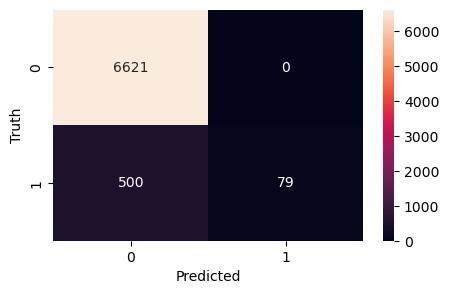

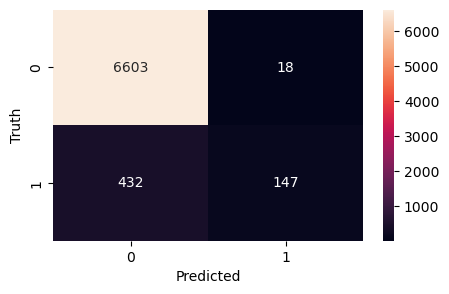

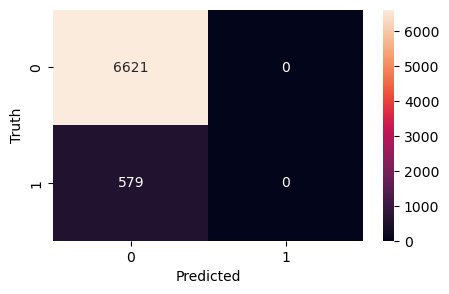

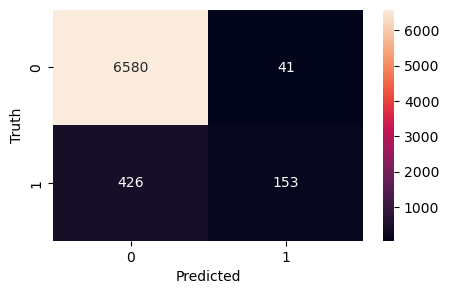

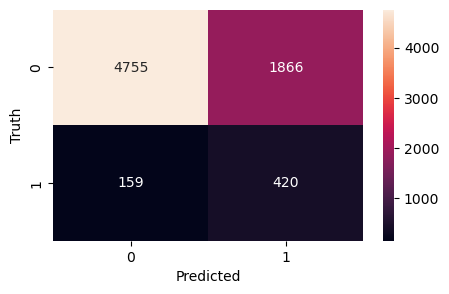

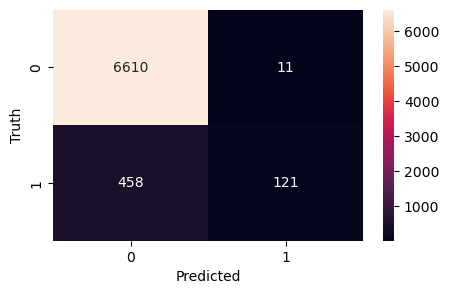

In [41]:
for i in predictions:
    cm = confusion_matrix(y_valid, i)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

## LGBM 모델 튜닝

- Learning rate 하이퍼파라미터 튜닝시에는 0.1~0.3 정도의 값을 사용하고, 최종 모형 학습시에는 0.05이하의 값을 사용하는 것이 좋다.  
- xgboost에서 디폴트 값은 0.3, lightgbm에서 디폴트 값은 0.1인
- lightgbm 같이 leaf-wise로 학습하는 경우에는 max_depth를 -1로 설정하는 것이 효과적이라고 알려져 있다. 경험적으로 보았을때도 lightgbm은 디폴트 설정을 사용할때가 보통 성능이 가장 좋았고, xgboost의 경우 max_depth에 따른 성능 차이가 큰 경우가 많았다.

- Maximum Leaves = 2^depth-1 의 관계가 있다. 예를 들어, Maximum Depth가 10인 경우 Maximum Leaves는 1023이다.



In [82]:
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT', 'DAYS_BIRTH_SQUARE']
categorical_columns : 36
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_fla

In [83]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a LightGBM model
lgbm_model=LGBMClassifier()
lgbm_model.fit(X_train,y_train)

y_pred_lgbm = lgbm_model.predict(X_valid)
models = 'lgbm'
predictions = y_pred_lgbm


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

Model: lgbm
Accuracy: 0.9375
Precision: 0.8909090909090909
Recall: 0.2538860103626943
F1-Score: 0.3951612903225807
AUC-ROC: 0.8516730797673912



### random search

In [73]:
def random_search_func():
    param_grid = {
        'n_estimators': [100, 200, 220, 250, 280, 300],
        'learning_rate': [ 0.05, 0.1],
        'max_depth': [-1, 3, 5],
        'num_leaves': [23, 25,31, 50],
        'min_child_samples': [20, 30 ,35, 40,45],
        'objective': ['binary'],
        'is_unbalance' : [True],

    }

    lgbm_model = LGBMClassifier(random_state=42)

    # Use stratified k-fold cross-validation for better generalization
    cv = StratifiedKFold(n_splits=5)

    # Use randomized search over the parameter grid (more efficient than exhaustive grid search)
    random_search = RandomizedSearchCV(lgbm_model,
                                       param_distributions=param_grid,
                                       n_iter=20,
                                       scoring='roc_auc',
                                       cv=cv,
                                       random_state=42)
    # Fit it to your data and find optimal hyperparameters
    random_search.fit(X_train,y_train)

    print(f"Best parameters: {random_search.best_params_}")
    print(f"Best score: {random_search.best_score_}")

    # Use the best estimator found by random search for prediction 
    y_pred_lgbm_random = random_search.best_estimator_.predict(X_valid)
    return random_search.best_params_



### Bayesian Optimization

In [74]:
def Bayesian_Optimization_func():
    # Suppress warnings
    warnings.filterwarnings("ignore")
    # Define the objective function to be optimized
    def objective(trial):
        params = {
            'n_estimators': trial.suggest_int('n_estimators', 50, 500),
            'learning_rate': trial.suggest_loguniform('learning_rate', 0.003, 0.5),
            'max_depth': trial.suggest_int('max_depth', -1, 25),
            'num_leaves': trial.suggest_int('num_leaves', 2, 256),
            'min_child_samples': trial.suggest_int('min_child_samples', 3, 200),
            'min_child_weight': trial.suggest_loguniform('min_child_weight',1e-5 ,1e-2), 
            'subsample': trial.suggest_uniform('subsample',0.6 ,1.0), 
            'colsample_bytree':trial.suggest_uniform('colsample_bytree',0.6 ,1.0),
            'reg_alpha': trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
            'reg_lambda': trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
            'is_unbalance' : True,
    # is_unbalace 변수 둘중 하나만 써야함
    #         'scale_pos_weight' : 11.042147516307075 ,
        }

        model = LGBMClassifier(verbose=-1, random_state=42 ,**params)
        model.fit(X_train,y_train)

        y_pred = model.predict_proba(X_valid)[:,1]

        return roc_auc_score(y_valid,y_pred)

    # Initialize a study object
    study = optuna.create_study(direction='maximize')

    # Optimize the study (this could take some time depending on how many evaluations we do)
    study.optimize(objective,n_trials=30)

    print(f"Best parameters: {study.best_params}")
    print(f"Best score: {study.best_value}")

    # Use the best estimator found by Optuna for prediction 
    best_params= study.best_params
    lgbm_model_best=LGBMClassifier(verbose=-1,**best_params)
    lgbm_model_best.fit(X_train,y_train)

    y_pred_lgbm_optuna = lgbm_model_best.predict(X_valid)
    return study.best_params

### Test Model

In [75]:
def test_model(best_param):

    # test model

    # Use the best estimator found by Optuna for prediction 
    best_params= best_param
    lgbm_model=LGBMClassifier(verbose=-1,**best_params)
    lgbm_model.fit(X_train,y_train)
    y_pred_lgbm = lgbm_model.predict(X_valid)
    models = 'lgbm'
    predictions = y_pred_lgbm
    print(f"Model: {models}")
    print("Accuracy:", accuracy_score(y_valid,predictions))
    print("Precision:", precision_score(y_valid,predictions))
    print("Recall:", recall_score(y_valid,predictions))
    print("F1-Score:", f1_score(y_valid,predictions))
    # For AUC-ROC score we need probability estimates of the positive class
    # Not all models have a predict_proba method (like SVC), hence we check if it exists
    if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
        print("AUC-ROC:", roc_auc_score(y_valid,
              eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
        print()
    cm = confusion_matrix(y_valid, y_pred_lgbm)
    plt.figure(figsize=(5,3))
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')

### Best parmeter 탐색

In [77]:
# hyper parameter tune
lgbm_param_list=[]
lgbm_adj_param_list=[]
for i in range(2):
    if i==0:
        X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
        Bayesian_param = Bayesian_Optimization_func()
        Randomsearch_param = random_search_func()
        lgbm_param_list.append(Bayesian_param)
        lgbm_param_list.append(Randomsearch_param)
        
    elif i==1:
        X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)
        Bayesian_param = Bayesian_Optimization_func()
        Randomsearch_param = random_search_func()
        lgbm_adj_param_list.append(Bayesian_param)
        lgbm_adj_param_list.append(Randomsearch_param)   

total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

[I 2023-09-23 12:42:16,882] A new study created in memory with name: no-name-e8010b2b-f708-44d0-9386-79fed6cfb78d


DAYS_REGISTRATION_predicted_flag
DAYS_ID_PUBLISH_predicted_flag
CB_SCORE_1_predicted_flag
CB_SCORE_2_predicted_flag
CB_SCORE_3_predicted_flag
ORGANIZATION_TYPE_predicted_flag


[I 2023-09-23 12:42:29,755] Trial 0 finished with value: 0.8436893758515259 and parameters: {'n_estimators': 296, 'learning_rate': 0.021490412434365534, 'max_depth': 18, 'num_leaves': 120, 'min_child_samples': 61, 'min_child_weight': 0.005494455737472146, 'subsample': 0.7864446423748724, 'colsample_bytree': 0.8437873705451748, 'reg_alpha': 0.05164998717512754, 'reg_lambda': 3.844064144316928e-06}. Best is trial 0 with value: 0.8436893758515259.
[I 2023-09-23 12:42:39,191] Trial 1 finished with value: 0.8224939279661536 and parameters: {'n_estimators': 475, 'learning_rate': 0.3944008654103427, 'max_depth': 23, 'num_leaves': 219, 'min_child_samples': 106, 'min_child_weight': 0.0002144529326120596, 'subsample': 0.8386058468409532, 'colsample_bytree': 0.7234628566460114, 'reg_alpha': 0.00014550541102928977, 'reg_lambda': 6.884301119405094e-06}. Best is trial 0 with value: 0.8436893758515259.
[I 2023-09-23 12:42:40,846] Trial 2 finished with value: 0.8448423514546144 and parameters: {'n_est

[I 2023-09-23 12:44:00,451] Trial 19 finished with value: 0.8299478369838575 and parameters: {'n_estimators': 424, 'learning_rate': 0.20273265822691058, 'max_depth': 12, 'num_leaves': 36, 'min_child_samples': 131, 'min_child_weight': 0.0026525299220111448, 'subsample': 0.9054022923056613, 'colsample_bytree': 0.6818601413134001, 'reg_alpha': 0.0018752081060113871, 'reg_lambda': 8.931198388845251}. Best is trial 13 with value: 0.8505644493798062.
[I 2023-09-23 12:44:01,213] Trial 20 finished with value: 0.7608719469297328 and parameters: {'n_estimators': 345, 'learning_rate': 0.08158779287245672, 'max_depth': 3, 'num_leaves': 2, 'min_child_samples': 149, 'min_child_weight': 0.0006442276132816418, 'subsample': 0.8344437105685465, 'colsample_bytree': 0.8691716800731955, 'reg_alpha': 0.00013990200580006994, 'reg_lambda': 0.0043177042907643305}. Best is trial 13 with value: 0.8505644493798062.
[I 2023-09-23 12:44:06,521] Trial 21 finished with value: 0.851791507578206 and parameters: {'n_est

Best parameters: {'n_estimators': 355, 'learning_rate': 0.03878289964327142, 'max_depth': 8, 'num_leaves': 88, 'min_child_samples': 107, 'min_child_weight': 0.007454351320487457, 'subsample': 0.9964939210890954, 'colsample_bytree': 0.7999127606920181, 'reg_alpha': 0.005993977405279238, 'reg_lambda': 0.1795154691019076}
Best score: 0.851791507578206
Best parameters: {'objective': 'binary', 'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 35, 'max_depth': -1, 'learning_rate': 0.05, 'is_unbalance': True}
Best score: 0.8396643064106604
total_columns : 64
numeric_columns : 27
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_MONTH', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'S

[I 2023-09-23 12:48:21,177] A new study created in memory with name: no-name-1271c0f4-6c31-43e2-84cf-9ee0249ceca6


TIME_CATEGORY


[I 2023-09-23 12:48:22,705] Trial 0 finished with value: 0.8292453565994418 and parameters: {'n_estimators': 263, 'learning_rate': 0.4827484911966425, 'max_depth': 3, 'num_leaves': 223, 'min_child_samples': 140, 'min_child_weight': 0.0012243122234907595, 'subsample': 0.8116109729702115, 'colsample_bytree': 0.6407901056450074, 'reg_alpha': 8.995751633675286e-07, 'reg_lambda': 0.0001861680984073014}. Best is trial 0 with value: 0.8292453565994418.
[I 2023-09-23 12:48:40,963] Trial 1 finished with value: 0.8515989971720795 and parameters: {'n_estimators': 336, 'learning_rate': 0.08795551142282688, 'max_depth': 20, 'num_leaves': 147, 'min_child_samples': 65, 'min_child_weight': 9.408032771421997e-05, 'subsample': 0.7795009712898716, 'colsample_bytree': 0.8934853558713318, 'reg_alpha': 0.0007886405847125344, 'reg_lambda': 6.770295569558383e-08}. Best is trial 1 with value: 0.8515989971720795.
[I 2023-09-23 12:48:47,534] Trial 2 finished with value: 0.8348158982292955 and parameters: {'n_est

[I 2023-09-23 12:50:55,419] Trial 19 finished with value: 0.844459417476032 and parameters: {'n_estimators': 212, 'learning_rate': 0.009013957887078003, 'max_depth': 23, 'num_leaves': 60, 'min_child_samples': 87, 'min_child_weight': 1.4543963453897793e-05, 'subsample': 0.7306086872229633, 'colsample_bytree': 0.9550459387226337, 'reg_alpha': 0.0009693606272604668, 'reg_lambda': 2.332037659031762e-05}. Best is trial 3 with value: 0.8604145651599467.
[I 2023-09-23 12:51:02,858] Trial 20 finished with value: 0.848833290422816 and parameters: {'n_estimators': 139, 'learning_rate': 0.02020360603167185, 'max_depth': 19, 'num_leaves': 119, 'min_child_samples': 27, 'min_child_weight': 1.08662233165546e-05, 'subsample': 0.7103214397685929, 'colsample_bytree': 0.9878057040573323, 'reg_alpha': 0.005061659345469259, 'reg_lambda': 1.156248459117304e-08}. Best is trial 3 with value: 0.8604145651599467.
[I 2023-09-23 12:51:07,140] Trial 21 finished with value: 0.8567294777516141 and parameters: {'n_es

Best parameters: {'n_estimators': 478, 'learning_rate': 0.03920553977495737, 'max_depth': 6, 'num_leaves': 171, 'min_child_samples': 105, 'min_child_weight': 0.00039160645654488644, 'subsample': 0.7721392896932741, 'colsample_bytree': 0.9658205564265071, 'reg_alpha': 3.892981046508457e-06, 'reg_lambda': 1.0122207957232107e-06}
Best score: 0.8604145651599467
Best parameters: {'objective': 'binary', 'num_leaves': 25, 'n_estimators': 200, 'min_child_samples': 45, 'max_depth': -1, 'learning_rate': 0.05, 'is_unbalance': True}
Best score: 0.8464605596350839


#### Best parmeter 확인 및 테스트 AUC 확인

In [78]:
lgbm_parm_total_list = [lgbm_param_list,lgbm_adj_param_list]
lgbm_parm_total_list

[[{'n_estimators': 355,
   'learning_rate': 0.03878289964327142,
   'max_depth': 8,
   'num_leaves': 88,
   'min_child_samples': 107,
   'min_child_weight': 0.007454351320487457,
   'subsample': 0.9964939210890954,
   'colsample_bytree': 0.7999127606920181,
   'reg_alpha': 0.005993977405279238,
   'reg_lambda': 0.1795154691019076},
  {'objective': 'binary',
   'num_leaves': 31,
   'n_estimators': 200,
   'min_child_samples': 35,
   'max_depth': -1,
   'learning_rate': 0.05,
   'is_unbalance': True}],
 [{'n_estimators': 478,
   'learning_rate': 0.03920553977495737,
   'max_depth': 6,
   'num_leaves': 171,
   'min_child_samples': 105,
   'min_child_weight': 0.00039160645654488644,
   'subsample': 0.7721392896932741,
   'colsample_bytree': 0.9658205564265071,
   'reg_alpha': 3.892981046508457e-06,
   'reg_lambda': 1.0122207957232107e-06},
  {'objective': 'binary',
   'num_leaves': 25,
   'n_estimators': 200,
   'min_child_samples': 45,
   'max_depth': -1,
   'learning_rate': 0.05,
   'is_

total_columns : 45
numeric_columns : 14
['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 31
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predicted_flag', 'CB_SCORE_1_pred

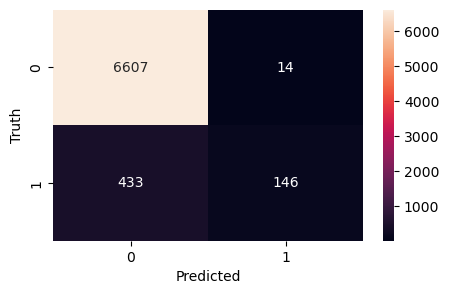

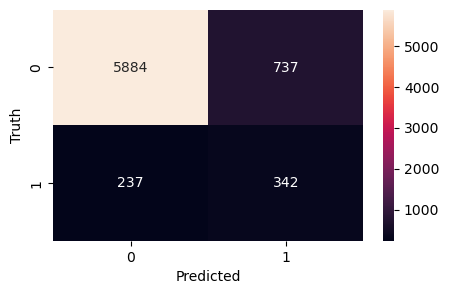

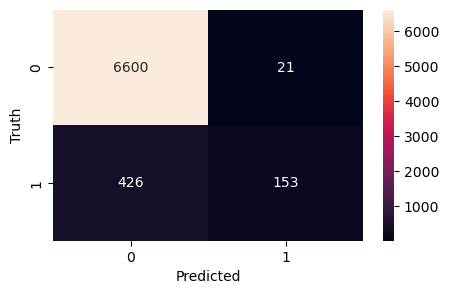

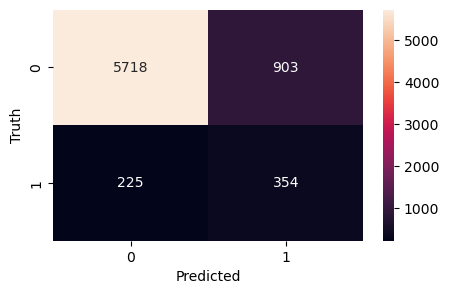

In [79]:
# test model

for i in range(2):
    if i==0:
        X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
        for param in lgbm_param_list:
            print("파생변수 미사용")
            print(param)
            test_model(param)
        
    elif i==1:
        for param in lgbm_adj_param_list:
            print("파생변수 사용")
            print(param)
            test_model(param) 

#### 주요변수 셀랙후 진행

Model: lgbm
Accuracy: 0.9379166666666666
Precision: 0.9074074074074074
Recall: 0.2538860103626943
F1-Score: 0.3967611336032389
AUC-ROC: 0.8485141352982959



Text(33.22222222222222, 0.5, 'Truth')

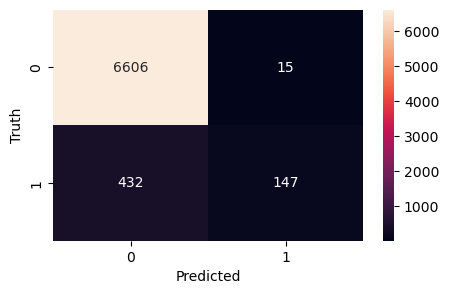

In [80]:

best_params= lgbm_parm_total_list[0][0]
lgbm_model=LGBMClassifier(verbose=-1,**best_params)
lgbm_model.fit(X_train,y_train)

feature_importances = pd.DataFrame({'feature': X_train.columns, 'importance': lgbm_model.feature_importances_})
# Importance 순으로 정렬
feature_importances = feature_importances.sort_values('importance', ascending=False)

# 상위 N개의 중요한 특성 선택 (예: 상위 45)
top_n_features = feature_importances['feature'][:45]
top_n_features


# 선택된 특성만으로 새로운 train/valid set 생성 
X_train = X_train[top_n_features]
X_valid = X_valid[top_n_features]

# 선택된 특성으로 모델 재학습 
lgbm_model.fit(X_train, y_train)

y_pred_lgbm = lgbm_model.predict(X_valid)
models = 'lgbm'
predictions = y_pred_lgbm


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()



cm = confusion_matrix(y_valid, y_pred_lgbm)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


[I 2023-09-23 12:57:21,387] A new study created in memory with name: no-name-7d157502-ce50-47fd-a9ac-267837db0758
[I 2023-09-23 12:57:22,152] Trial 0 finished with value: 0.7668018152322685 and parameters: {'n_estimators': 357, 'learning_rate': 0.15513971668875826, 'max_depth': 1, 'num_leaves': 50, 'min_child_samples': 7, 'min_child_weight': 7.037884732131615e-05, 'subsample': 0.7510118566190587, 'colsample_bytree': 0.7049651456817817, 'reg_alpha': 5.327654439517004e-08, 'reg_lambda': 0.00328437417607188}. Best is trial 0 with value: 0.7668018152322685.
[I 2023-09-23 12:57:23,052] Trial 1 finished with value: 0.8440070962778974 and parameters: {'n_estimators': 162, 'learning_rate': 0.05501721438029334, 'max_depth': 4, 'num_leaves': 180, 'min_child_samples': 171, 'min_child_weight': 1.0017673936824586e-05, 'subsample': 0.7765419860599674, 'colsample_bytree': 0.8955908769663072, 'reg_alpha': 0.013111557044676064, 'reg_lambda': 0.009052949010440233}. Best is trial 1 with value: 0.84400709

[I 2023-09-23 12:59:07,348] Trial 18 finished with value: 0.7857393090858912 and parameters: {'n_estimators': 425, 'learning_rate': 0.0041494839146673165, 'max_depth': 2, 'num_leaves': 45, 'min_child_samples': 152, 'min_child_weight': 0.0008212232102371293, 'subsample': 0.9392237313803661, 'colsample_bytree': 0.6462213829101536, 'reg_alpha': 1.0002601970604852e-08, 'reg_lambda': 2.4678112193426323e-08}. Best is trial 9 with value: 0.8507293092397951.
[I 2023-09-23 12:59:11,840] Trial 19 finished with value: 0.844304470075979 and parameters: {'n_estimators': 126, 'learning_rate': 0.03955357741026125, 'max_depth': -1, 'num_leaves': 102, 'min_child_samples': 102, 'min_child_weight': 0.0037988588331793424, 'subsample': 0.89008565650283, 'colsample_bytree': 0.9972790246103909, 'reg_alpha': 7.808840520739434e-06, 'reg_lambda': 3.5333349096886734e-06}. Best is trial 9 with value: 0.8507293092397951.
[I 2023-09-23 12:59:18,499] Trial 20 finished with value: 0.8459512426964082 and parameters: {

Best parameters: {'n_estimators': 261, 'learning_rate': 0.046994770086894684, 'max_depth': 7, 'num_leaves': 71, 'min_child_samples': 191, 'min_child_weight': 0.0019993124256762486, 'subsample': 0.9626816525447806, 'colsample_bytree': 0.7810872217154903, 'reg_alpha': 1.5380677931315214e-07, 'reg_lambda': 6.188996724496079e-07}
Best score: 0.8507293092397951
Best parameters: {'objective': 'binary', 'num_leaves': 25, 'n_estimators': 200, 'min_child_samples': 45, 'max_depth': -1, 'learning_rate': 0.05, 'is_unbalance': True}
Best score: 0.83969279241637
주요변수만 사용
{'n_estimators': 261, 'learning_rate': 0.046994770086894684, 'max_depth': 7, 'num_leaves': 71, 'min_child_samples': 191, 'min_child_weight': 0.0019993124256762486, 'subsample': 0.9626816525447806, 'colsample_bytree': 0.7810872217154903, 'reg_alpha': 1.5380677931315214e-07, 'reg_lambda': 6.188996724496079e-07}
Model: lgbm
Accuracy: 0.9379166666666666
Precision: 0.9285714285714286
Recall: 0.2469775474956822
F1-Score: 0.390177353342428

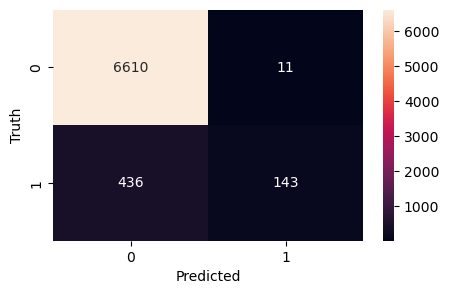

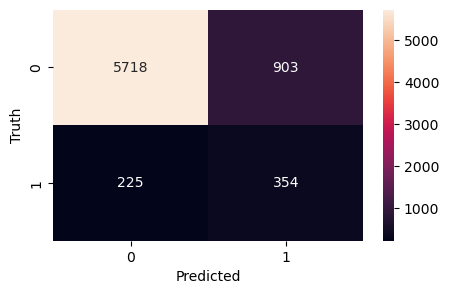

In [81]:
lgbm_param_list_importance_feautre=[]
Bayesian_param = Bayesian_Optimization_func()
Randomsearch_param = random_search_func()
lgbm_param_list_importance_feautre.append(Bayesian_param)
lgbm_param_list_importance_feautre.append(Randomsearch_param)

for param in lgbm_param_list_importance_feautre:
    print("주요변수만 사용")
    print(param)
    test_model(param)

## GB 모델 튜닝

In [49]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

In [50]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train,y_train)

y_pred_gb = gb_model.predict(X_valid)
models = 'gb'
predictions = y_pred_gb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

Model: gb
Accuracy: 0.9366666666666666
Precision: 0.948905109489051
Recall: 0.22452504317789293
F1-Score: 0.36312849162011174
AUC-ROC: 0.8205162617818064



### random search

In [64]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 150, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.02, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7 ,9],
    'min_samples_split': [2 ,4 ,6 ,8 ,10],
    'min_samples_leaf' : [1 ,2 ,3 ,4],
    'subsample' : [0.6, 0.7, 0.8, 0.85, 0.9], 
    
}

gb_model = GradientBoostingClassifier(random_state=42)

# Use stratified k-fold cross-validation for better generalization
cv = StratifiedKFold(n_splits=5)

# Use randomized search over the parameter grid (more efficient than exhaustive grid search)
random_search = RandomizedSearchCV(gb_model,
                                   param_distributions=param_grid,
                                   n_iter=30,
                                   scoring='roc_auc',
                                   cv=cv,
                                   random_state=42)
# Fit it to your data and find optimal hyperparameters
random_search.fit(X_train,y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator found by random search for prediction 
y_pred_gb = random_search.best_estimator_.predict(X_valid)



Best parameters: {'subsample': 0.6, 'n_estimators': 200, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_depth': 3, 'learning_rate': 0.1}
Best score: 0.8299736568814975


### Bayesian Optimization

In [65]:
# import optuna
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import roc_auc_score

# import warnings

# # Suppress warnings
# warnings.filterwarnings("ignore")

# # Define the objective function to be optimized
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 50, 300),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.5),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
#         'min_samples_leaf': trial.suggest_int('min_samples_leaf',1 ,10), 
#         'subsample': trial.suggest_uniform('subsample',0.3 ,1.0), 
#     }
    
#     model = GradientBoostingClassifier(random_state=42 ,**params)
#     model.fit(X_train,y_train)
    
#     y_pred = model.predict_proba(X_valid)[:,1]
    
#     return roc_auc_score(y_valid,y_pred)

# # Initialize a study object
# study = optuna.create_study(direction='maximize')

# # Optimize the study (this could take some time depending on how many evaluations we do)
# study.optimize(objective,n_trials=1)

# print(f"Best parameters: {study.best_params}")
# print(f"Best score: {study.best_value}")

# # Use the best estimator found by Optuna for prediction 
# best_params= study.best_params
# gb_model_best=GradientBoostingClassifier(random_state=42,**best_params)
# gb_model_best.fit(X_train,y_train)

# y_pred_gb_optuna = gb_model_best.predict(X_valid)

[I 2023-09-21 21:37:49,478] A new study created in memory with name: no-name-10d9efda-d0f2-451a-aeb2-400308915eba
[I 2023-09-21 21:37:56,957] Trial 0 finished with value: 0.816200037615177 and parameters: {'n_estimators': 175, 'learning_rate': 0.0017485982651630648, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 4, 'subsample': 0.31679818730612724}. Best is trial 0 with value: 0.816200037615177.


Best parameters: {'n_estimators': 175, 'learning_rate': 0.0017485982651630648, 'max_depth': 6, 'min_samples_split': 4, 'min_samples_leaf': 4, 'subsample': 0.31679818730612724}
Best score: 0.816200037615177


#### Best parmeter 적용

- 파생변수 미적용
- 파생변수 적용

In [57]:
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 63
numeric_columns : 28
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET', 'AGE', 'YEARS_EMPLOYED', 'DAYS_REGISTRATION_MONTH', 'MONTH_EMPLOYED', 'DAYS_ID_PUBLISH_YEARS', 'ANNUITY_INCOME_PERCENT', 'AVG_CB_SCORE', 'MIN_CB_SCORE', 'MEDIAN_CB_SCORE', 'STD_CB_SCORE', 'MAX_CB_SCORE', 'CHILDREN_INCOME_PERCENT', 'DAYS_EMPLOYED_PERCENT']
categorical_columns : 35
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', '

Model: gb
Accuracy: 0.9361111111111111
Precision: 0.9047619047619048
Recall: 0.229706390328152
F1-Score: 0.36639118457300274
AUC-ROC: 0.8233693546910326



Text(33.22222222222222, 0.5, 'Truth')

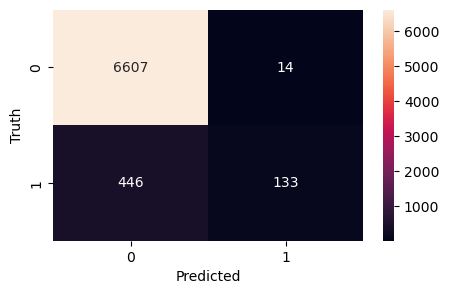

In [58]:
# Use the best estimator found by Optuna for prediction 
# randomsearch
best_params= {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 5, 'learning_rate': 0.05}
# optuna
best_params= {'n_estimators': 153, 'learning_rate': 0.07226568614896693, 'max_depth': 8, 'min_samples_split': 3, 'min_samples_leaf': 2, 'subsample': 0.8224685258192438}

# Train a Gradient Boosting model
gb_model = GradientBoostingClassifier(**best_params)
gb_model.fit(X_train,y_train)

y_pred_gb = gb_model.predict(X_valid)
models = 'gb'
predictions = y_pred_gb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()



cm = confusion_matrix(y_valid, y_pred_gb)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## XGB 모델 튜닝

In [59]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

In [52]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a Gradient Boosting model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train,y_train)


y_pred_xgb = xgb_model.predict(X_valid)
models = 'xgb'
predictions = y_pred_xgb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

C:\Users\galaxy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: xgb
Accuracy: 0.9365277777777777
Precision: 0.8351648351648352
Recall: 0.26252158894645944
F1-Score: 0.39947437582128775
AUC-ROC: 0.8254121040004863



### random search

In [61]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1 ,2 ,4],
    'subsample': [0.8 ,1.0],
    'colsample_bytree' : [0.6 ,0.8 ,1.0]
}

xgb_model = XGBClassifier(random_state=42)

# Use stratified k-fold cross-validation for better generalization
cv = StratifiedKFold(n_splits=5)

# Use randomized search over the parameter grid (more efficient than exhaustive grid search)
random_search = RandomizedSearchCV(xgb_model,
                                   param_distributions=param_grid,
                                   n_iter=1,
                                   scoring='roc_auc',
                                   cv=cv,
                                   random_state=42)
# Fit it to your data and find optimal hyperparameters
random_search.fit(X_train,y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator found by random search for prediction 
y_pred_xgb_random = random_search.best_estimator_.predict(X_valid)

Best parameters: {'subsample': 0.8, 'n_estimators': 400, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best score: 0.8419491230337804


### Bayesian Optimization

In [66]:

# # Define the objective function to be optimized
# def objective(trial):
#     params = {
#         'n_estimators': trial.suggest_int('n_estimators', 100, 500),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_weight': trial.suggest_loguniform('min_child_weight',1e-3 ,1e2), 
#         'subsample' : trial.suggest_uniform('subsample',0.6 ,1.0), 
#         'colsample_bytree' :trial.suggest_uniform('colsample_bytree',0.6 ,1.0),
#         'scale_pos_weight' : trial.suggest_float("scale_pos_weight", 1, 10)
#     }
    
#     model = XGBClassifier(random_state=42,**params)
#     model.fit(X_train,y_train)
    
#     y_pred = model.predict_proba(X_valid)[:,1]
    
#     return roc_auc_score(y_valid,y_pred)

# # Initialize a study object
# study = optuna.create_study(direction='maximize')

# # Optimize the study (this could take some time depending on how many evaluations we do)
# study.optimize(objective,n_trials=100)

# print(f"Best parameters: {study.best_params}")
# print(f"Best score: {study.best_value}")

# # Use the best estimator found by Optuna for prediction 
# best_params= study.best_params
# xgb_model_best=XGBClassifier(random_state=42,**best_params)
# xgb_model_best.fit(X_train,y_train)

# y_pred_xgb_optuna = xgb_model_best.predict(X_valid)

#### Best parmeter 적용

- 파생변수 미적용
- 파생변수 적용 

In [70]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

C:\Users\galaxy\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Model: xgb
Accuracy: 0.9195833333333333
Precision: 0.5
Recall: 0.36787564766839376
F1-Score: 0.42388059701492536
AUC-ROC: 0.8454892698925462



Text(33.22222222222222, 0.5, 'Truth')

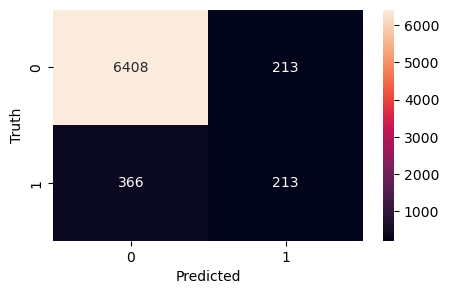

In [75]:
# Use the best estimator found by Optuna for prediction 
# randomsearch
#best_params= {'subsample': 0.8, 'scale_pos_weight': 5, 'n_estimators': 100, 'min_child_weight': 2, 'max_depth': 5, 'learning_rate': 0.05, 'colsample_bytree': 1.0}
# optuna
best_params= {'n_estimators': 258, 'learning_rate': 0.031968707036049, 'max_depth': 7, 'min_child_weight': 0.00463655506257617, 'subsample': 0.7079895906282183, 'colsample_bytree': 0.725007840678986, 'scale_pos_weight': 6.384854289063748}


# Train a Gradient Boosting model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss',**best_params)
xgb_model.fit(X_train,y_train)


y_pred_xgb = xgb_model.predict(X_valid)
models = 'xgb'
predictions = y_pred_xgb


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()
cm = confusion_matrix(y_valid, y_pred_xgb)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')    

## Randomforest 모델 튜닝

In [76]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Train a rF model
random_forest_model = RandomForestClassifier(n_estimators=100)
random_forest_model.fit(X_train,y_train)

y_pred_rf = random_forest_model.predict(X_valid)
models = 'Random forest'
predictions = y_pred_rf


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()

Model: Random forest
Accuracy: 0.9294444444444444
Precision: 1.0
Recall: 0.1226252158894646
F1-Score: 0.21846153846153848
AUC-ROC: 0.7807886874833543



### random search

In [78]:
from sklearn.model_selection import StratifiedKFold, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1 ,2 ,4],
    'max_features': ['auto', 'sqrt'],
    'class_weight' : ['balanced', None],
}

rf_model = RandomForestClassifier(random_state=42)

# Use stratified k-fold cross-validation for better generalization
cv = StratifiedKFold(n_splits=5)

# Use randomized search over the parameter grid (more efficient than exhaustive grid search)
random_search = RandomizedSearchCV(rf_model,
                                   param_distributions=param_grid,
                                   n_iter=30,
                                   scoring='roc_auc',
                                   cv=cv,
                                   random_state=42)
# Fit it to your data and find optimal hyperparameters
random_search.fit(X_train,y_train)

print(f"Best parameters: {random_search.best_params_}")
print(f"Best score: {random_search.best_score_}")

# Use the best estimator found by random search for prediction 
y_pred_rf_random = random_search.best_estimator_.predict(X_valid)

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value f

Best parameters: {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 7, 'class_weight': None}
Best score: 0.8152254466885651


### Bayesian Optimization

In [79]:
import optuna
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Define the objective function to be optimized
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 20),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1 ,10),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt']),
        'class_weight' : trial.suggest_categorical("class_weight", [None, "balanced"])
    }
    
    model = RandomForestClassifier(random_state=42,**params)
    model.fit(X_train,y_train)
    
    y_pred = model.predict_proba(X_valid)[:,1]
    
    return roc_auc_score(y_valid,y_pred)

# Initialize a study object
study = optuna.create_study(direction='maximize')

# Optimize the study (this could take some time depending on how many evaluations we do)
study.optimize(objective,n_trials=1)

print(f"Best parameters: {study.best_params}")
print(f"Best score: {study.best_value}")

# Use the best estimator found by Optuna for prediction 
best_params= study.best_params
rf_model_best=RandomForestClassifier(random_state=42,**best_params)
rf_model_best.fit(X_train,y_train)

y_pred_rf_optuna = rf_model_best.predict(X_valid)

[I 2023-09-21 22:27:12,474] A new study created in memory with name: no-name-8ca25507-7d3c-4c78-b319-f86b88c86e28
[I 2023-09-21 22:27:28,754] Trial 0 finished with value: 0.7994443283643216 and parameters: {'n_estimators': 387, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': None}. Best is trial 0 with value: 0.7994443283643216.


Best parameters: {'n_estimators': 387, 'max_depth': 8, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'class_weight': None}
Best score: 0.7994443283643216


#### Best parmeter 적용

- 파생변수 미적용
- 파생변수 적용 

In [80]:
X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA)
#X_train, X_valid, y_train, y_valid = Make_model_inputdata(FILLED_DATA_ADJ)

total_columns : 47
numeric_columns : 15
['SK_ID_CURR', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'REGION_RATING_CLIENT', 'HOUR_APPR_PROCESS_START', 'CB_SCORE_1', 'CB_SCORE_2', 'CB_SCORE_3', 'TARGET']
categorical_columns : 32
['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 'WEEKDAY_APPR_PROCESS_START', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'CODE_GENDER_predicted_flag', 'FLAG_OWN_REALTY_predicted_flag', 'AMT_CREDIT_predicted_flag', 'REGION_POPULATION_RELATIVE_predicted_flag', 'DAYS_BIRTH_predicted_flag', 'DAYS_EMPLOYED_predicted_flag', 'DAYS_REGISTRATION_predicted_flag', 'DAYS_ID_PUBLISH_predi

C:\Users\galaxy\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Model: Random forest
Accuracy: 0.8875
Precision: 0.3445491251682369
Recall: 0.4421416234887737
F1-Score: 0.38729198184568836
AUC-ROC: 0.8170225109356606



Text(33.22222222222222, 0.5, 'Truth')

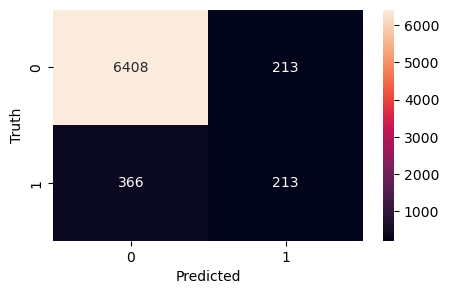

In [82]:
# Use the best estimator found by Optuna for prediction 
# randomsearch
best_params= {'n_estimators': 400, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': 7, 'class_weight': None}
# optuna
best_params= {'n_estimators': 490, 'max_depth': 10, 'min_samples_split': 3, 'min_samples_leaf': 4, 'max_features': 'auto', 'class_weight': 'balanced'}


# Train a rF model
random_forest_model = RandomForestClassifier(**best_params)
random_forest_model.fit(X_train,y_train)

y_pred_rf = random_forest_model.predict(X_valid)
models = 'Random forest'
predictions = y_pred_rf


print(f"Model: {models}")
print("Accuracy:", accuracy_score(y_valid,predictions))
print("Precision:", precision_score(y_valid,predictions))
print("Recall:", recall_score(y_valid,predictions))
print("F1-Score:", f1_score(y_valid,predictions))
# For AUC-ROC score we need probability estimates of the positive class
# Not all models have a predict_proba method (like SVC), hence we check if it exists
if hasattr(eval(models.lower().replace(' ', '_')+'_model'), "predict_proba"):
    print("AUC-ROC:", roc_auc_score(y_valid,
          eval(models.lower().replace(' ', '_')+'_model').predict_proba(X_valid)[:, 1]))
    print()
    
cm = confusion_matrix(y_valid, y_pred_xgb)
plt.figure(figsize=(5,3))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')    